# Preparación entorno de trabajo

## Importación de Librerías

In [1]:
# Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#import json
import requests

import rarfile, csv
import glob
import psycopg2

## Parte 1 - Algunas librerías, funciones y principios de utilidad


In [2]:
#Generar Dataframes a partir de los archivos
def CrearDataframe(path_csv):
    allFiles = glob.glob(path_csv + "/*.csv")
    frame = pd.DataFrame()
    list_ = []
    for file_ in allFiles:
        df = pd.read_csv(file_,index_col=None, header=0, sep=";")
        list_.append(df)
    return pd.concat(list_)

In [3]:
# Se Crea una funcion que cuenta la cantidad de elementos que tiene cada valor de cada columna del dataframe
# Esta funcion nos ayudara para analizar el rango de valores valido en cada columna del dataframe
def RevisaColumnasSeleccionadas(basedatos,lista_columnas_seleccionadas):
    print ('Cantidad de columnas',len(lista_columnas_seleccionadas))
    print()
    for i in range (0,len(lista_columnas_seleccionadas)): 
        #print(i)
        x= pd.DataFrame(basedatos[(lista_columnas_seleccionadas[i])].value_counts().reset_index())
        x=x.rename(columns={"index": "valores"})
        print(x.sort_values(by='valores'))
        print()   
        

In [4]:
#funcion para transformar datos fuera de norma a NaN
def ColumnasLimites(base,Columnas_Limites):
    for i in range(0,len(Columnas_Limites)):
        base[(Columnas_Limites[i][0])] = np.where(base[(Columnas_Limites[i][0])] > (Columnas_Limites[i][1]), np.NaN, base[(Columnas_Limites[i][0])])

In [5]:
# Funcion pasa de datos de columna de notacion cientifica a enteros
def notacion_cientifica_a_enteros(base,col_limite):
    for i in range(0,len(col_limite)): 
        base[(col_limite[i][0])].fillna(999999, inplace=True)
        base[(col_limite[i][0])] = base[(col_limite[i][0])].astype(int)

In [6]:
# Fucnion para comparar si 2 columnas son identicas
def comparacion(base,x,y):    
    base['compara_columnas'] = (base[(x)] == base[(y)]).astype(bool)
    comparacion = (base['compara_columnas'] == True).all()
    if comparacion == True:
        print('Las Columnas Son Iguales')
    else:
        print('Las Columnas Son Distintas')
    del base['compara_columnas']
   

In [7]:
# Se crea una funcion para crear listas con datos de a pares.
def crear_lista_pares(lista):
    nombre_lista_pares = [(lista[i],lista[i+1]) for i in range(0,len(lista),2)]
    return nombre_lista_pares

In [8]:
# Se crea una funcion que utiliza una lista de a pares y renombra las categorias de una columna
def renombrar_categorias_columna(basedatos,columna,lista_pares):
    for i in range (0,len(lista_pares)):
        basedatos[columna].replace((lista_pares[i][0]),(lista_pares[i][1]),inplace=True)               

In [9]:
#df_chile_copia['Rama_acti_econom'].replace((letras_acti_econom2[i][0]),(letras_acti_econom2[i][1]),inplace=True)

## Parte 2 - Carga de Datos

### Generar Dataframes a partir de los archivos

In [10]:
path_15r =r'/home/c4-2/Descargas/Censo_15/15r_daniel_rosales'   #ruta de la carpeta a leer
path_chile =r'/home/c4-2/Descargas/Censo_15/censo_chile_sample' #ruta de la carpeta a leer


#df_15r = CrearDataframe(path_15r)
#df_chile = CrearDataframe(path_chile)

In [11]:
df_15r_copia = CrearDataframe(path_15r)
df_chile_copia = CrearDataframe(path_chile)

### Inspeccionar contenido DataFrames

In [12]:
df_chile_copia.head(20)

,Unnamed: 0,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,P07,P08,...,P12PAIS_GRUPO,ESCOLARIDAD,P16A_GRUPO,REGION_15R,PROVINCIA_15R,COMUNA_15R,P10COMUNA_15R,P11COMUNA_15R,P12COMUNA_15R,REGION_PROVINCIA_COMUNA
0,1860817,1.0,1.0,1.0,15885.0,166.0,1.0,3.0,5.0,1.0,...,998.0,11.0,98.0,13.0,132.0,13203.0,98.0,99.0,98.0,13_132_13203
1,13659774,11.0,1.0,3.0,14254.0,364.0,1.0,2.0,2.0,2.0,...,999.0,99.0,98.0,6.0,61.0,6101.0,98.0,98.0,99.0,6_61_6101
2,6201426,11.0,1.0,2.0,12185.0,577.0,1.0,2.0,7.0,2.0,...,998.0,9.0,1.0,13.0,131.0,13110.0,98.0,98.0,6301.0,13_131_13110
3,16274805,15.0,1.0,3.0,15750.0,618.0,1.0,1.0,1.0,1.0,...,998.0,21.0,98.0,4.0,41.0,4101.0,98.0,98.0,4301.0,4_41_4101
4,16157342,3.0,1.0,3.0,15805.0,1932.0,1.0,2.0,7.0,2.0,...,862.0,15.0,98.0,4.0,41.0,4101.0,98.0,98.0,98.0,4_41_4101
5,16054362,17.0,1.0,1.0,1752.0,208.0,1.0,3.0,14.0,1.0,...,998.0,12.0,98.0,4.0,41.0,4102.0,98.0,98.0,98.0,4_41_4102
6,707205,1.0,1.0,1.0,6666.0,2246.0,1.0,1.0,1.0,1.0,...,998.0,17.0,98.0,13.0,136.0,13604.0,98.0,98.0,13123.0,13_136_13604
7,14082001,11.0,1.0,4.0,9108.0,44.0,1.0,2.0,5.0,1.0,...,998.0,12.0,1.0,5.0,58.0,5801.0,98.0,98.0,98.0,5_58_5801
8,9439285,6.0,2.0,23.0,8500.0,23.0,1.0,1.0,1.0,1.0,...,998.0,12.0,98.0,9.0,91.0,9105.0,98.0,98.0,13101.0,9_91_9105
9,3704754,1.0,1.0,3.0,11738.0,139.0,1.0,2.0,2.0,1.0,...,998.0,17.0,98.0,13.0,131.0,13123.0,98.0,98.0,9111.0,13_131_13123


In [13]:
df_15r_copia.head(20)

,Unnamed: 0,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,P07,P08,...,P12PAIS_GRUPO,ESCOLARIDAD,P16A_GRUPO,REGION_15R,PROVINCIA_15R,COMUNA_15R,P10COMUNA_15R,P11COMUNA_15R,P12COMUNA_15R,REGION_PROVINCIA_COMUNA
0,146489,12.0,2.0,4.0,7512.0,1.0,1.0,946.0,17.0,1.0,...,998.0,10.0,98.0,15.0,151.0,15101.0,98.0,13404.0,13402.0,15_151_15101
1,189206,18.0,1.0,2.0,5464.0,191.0,1.0,5.0,5.0,2.0,...,998.0,12.0,98.0,15.0,151.0,15101.0,98.0,98.0,98.0,15_151_15101
2,114837,12.0,1.0,2.0,1501.0,420.0,1.0,1.0,1.0,1.0,...,998.0,12.0,98.0,15.0,151.0,15101.0,98.0,98.0,98.0,15_151_15101
3,158322,17.0,1.0,2.0,5575.0,212.0,1.0,2.0,2.0,1.0,...,998.0,8.0,98.0,15.0,151.0,15101.0,13101.0,13101.0,13127.0,15_151_15101
4,137799,12.0,1.0,8.0,1480.0,638.0,1.0,4.0,5.0,1.0,...,998.0,0.0,1.0,15.0,151.0,15101.0,98.0,98.0,1101.0,15_151_15101
5,143564,12.0,1.0,10.0,5710.0,478.0,1.0,1.0,1.0,1.0,...,998.0,17.0,98.0,15.0,151.0,15101.0,98.0,98.0,3101.0,15_151_15101
6,218110,19.0,1.0,2.0,12255.0,1019.0,1.0,4.0,14.0,1.0,...,998.0,13.0,6.0,15.0,151.0,15101.0,98.0,2201.0,2201.0,15_151_15101
7,154692,17.0,1.0,1.0,15089.0,344.0,1.0,1.0,1.0,2.0,...,68.0,12.0,2.0,15.0,151.0,15101.0,98.0,98.0,98.0,15_151_15101
8,13483,3.0,1.0,1.0,11216.0,878.0,1.0,2.0,15.0,1.0,...,998.0,17.0,99.0,15.0,151.0,15101.0,98.0,13101.0,13101.0,15_151_15101
9,13710,3.0,1.0,1.0,11216.0,994.0,1.0,5.0,5.0,1.0,...,998.0,0.0,98.0,15.0,151.0,15101.0,98.0,98.0,98.0,15_151_15101


In [14]:
#Shapes de cada DataFrame
col_name = ["filas", "columnas"]
raw_name = ["sample chile", "sample region 15"]
dfs_list = [df_chile_copia.shape, df_15r_copia.shape]

pd.DataFrame(dfs_list, raw_name, col_name)

,filas,columnas
sample chile,50000,47
sample region 15,50000,47


## Parte 3 - Preprocesamiento y transformación de datos

In [15]:
# Se crea una lista que contiene los nombres de las columnas del dataframe df_15r_copia
lista_todas_las_columnas=df_15r_copia.columns

In [16]:
lista_todas_las_columnas

Index(['Unnamed: 0', 'DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC', 'NVIV', 'NHOGAR',
       'PERSONAN', 'P07', 'P08', 'P09', 'P10', 'P10COMUNA', 'P10PAIS', 'P11',
       'P11COMUNA', 'P11PAIS', 'P12', 'P12COMUNA', 'P12PAIS', 'P12A_LLEGADA',
       'P12A_TRAMO', 'P13', 'P14', 'P15', 'P15A', 'P16', 'P16A', 'P16A_OTRO',
       'P17', 'P18', 'P19', 'P20', 'P21M', 'P21A', 'P10PAIS_GRUPO',
       'P11PAIS_GRUPO', 'P12PAIS_GRUPO', 'ESCOLARIDAD', 'P16A_GRUPO',
       'REGION_15R', 'PROVINCIA_15R', 'COMUNA_15R', 'P10COMUNA_15R',
       'P11COMUNA_15R', 'P12COMUNA_15R', 'REGION_PROVINCIA_COMUNA'],
      dtype='object')

In [17]:
#Aplicamos funcion revisacolumnas en todo el dataframe df_15r_copia
# y se observan los valores fuera de norma de cada columna
# en este punto identificamos columnas que contienen valores int , reales y en notacion cientifica
RevisaColumnasSeleccionadas(df_15r_copia,lista_todas_las_columnas)

Cantidad de columnas 47

       valores  Unnamed: 0
5753         9           1
11954       13           1
33497       14           1
8837        15           1
38482       18           1
44772       22           1
30738       25           1
35402       28           1
32251       30           1
22918       36           1
15984       39           1
4183        40           1
35377       60           1
36919       61           1
44893       62           1
26004       66           1
4109        72           1
12093       77           1
26490       80           1
38628       82           1
48043       84           1
26003       90           1
36943       93           1
49955       94           1
28812       96           1
15091       99           1
22869      100           1
8907       111           1
41750      112           1
40227      115           1
...        ...         ...
18724   225935           1
30885   225938           1
28121   225941           1
48356   225946           1
103

     valores    P12
0        1.0  27439
1        2.0  16974
3        3.0   1836
8        4.0     68
2        5.0   1906
7        6.0     81
6        7.0    231
5        8.0    301
4       99.0   1007
11  100000.0      2
16  110000.0      1
9   130000.0      3
14  140000.0      1
15  150000.0      1
27  180000.0      1
10  190000.0      2
21  220000.0      1
19  240000.0      1
25  280000.0      1
18  320000.0      1
20  340000.0      1
12  360000.0      1
23  390000.0      1
17  420000.0      1
24  480000.0      1
13  500000.0      1
26  510000.0      1
22  900000.0      1

          valores  P12COMUNA
0    9.800000e+01      31852
3    9.900000e+01       1004
6    9.970000e+02        678
54   1.000000e+03         65
2    1.101000e+03       1444
72   1.107000e+03         41
10   1.401000e+03        299
28   1.402000e+03        115
82   1.403000e+03         31
21   1.404000e+03        174
103  1.405000e+03         22
107  2.000000e+03         21
4    2.101000e+03        856
84   2.102000

       valores   P16A
2          1.0   1750
1          2.0  13120
9          3.0      8
7          4.0    164
5          5.0    578
8          6.0     70
6          7.0    415
11         8.0      3
22         9.0      1
3         10.0   1299
0         98.0  31305
4         99.0   1144
20    200000.0      1
21    300000.0      1
13    320000.0      3
17    380000.0      1
15    650000.0      1
16   1100000.0      1
10   9800000.0      4
25   9900000.0      1
12  10780000.0      3
19  11760000.0      1
23  13720000.0      1
26  15680000.0      1
14  16660000.0      2
24  17640000.0      1
18  18620000.0      1

       valores  P16A_OTRO
18         4.0          1
6          5.0         10
14         6.0          1
7         21.0          7
12        23.0          2
4         33.0         34
5         34.0         13
2         35.0        997
3         97.0        236
0         98.0      47426
1         99.0       1142
16   9800000.0          1
10  11760000.0          3
9   12740000.0     

        valores  REGION_PROVINCIA_COMUNA
0  15_151_15101                    48867
2  15_151_15102                      281
1  15_152_15201                      583
3  15_152_15202                      139



In [18]:
# Se contabilizan los elementos nulos de cada columna en todo el dataframe df_15r_copia
df_15r_copia.isnull().sum()                          

Unnamed: 0                   0
DC                         137
AREA                       128
ZC_LOC                     105
ID_ZONA_LOC                119
NVIV                       123
NHOGAR                     110
PERSONAN                   116
P07                        122
P08                        148
P09                        134
P10                        122
P10COMUNA                  127
P10PAIS                    122
P11                        117
P11COMUNA                  133
P11PAIS                    117
P12                        134
P12COMUNA                  142
P12PAIS                    116
P12A_LLEGADA               121
P12A_TRAMO                 147
P13                        125
P14                        140
P15                        134
P15A                       129
P16                        120
P16A                       120
P16A_OTRO                  111
P17                        116
P18                        117
P19                        123
P20     

## Pregunta 4

In [19]:
#Se Elimina la columna 'Unnamed: 0' del dataframe df_15r_copia  
df_15r_copia.drop('Unnamed: 0', axis=1, inplace=True)

In [20]:
# Se crean dos listas_columnas2 sera las lista con los nombres de las columnas con valores tipo int y real
# la Lista lista_columnas3 es una listya con columnas que contienen valores en notacion cientifica y seran tratados
# con un tratamiento diferente
lista_columnas_enteros = ['DC','AREA','ZC_LOC','NVIV','NHOGAR',
       'PERSONAN','P07','P08','P09','P10','P10COMUNA','P10PAIS','P11',
       'P11COMUNA','P11PAIS','P12','P12PAIS','P12A_TRAMO',
       'P13','P14','P15','P15A','P16','P16A','P16A_OTRO',
       'P17','P18','P19','P20','P21M','P10PAIS_GRUPO',
       'P11PAIS_GRUPO','P12PAIS_GRUPO','ESCOLARIDAD','P16A_GRUPO',
       'REGION_15R','PROVINCIA_15R','P10COMUNA_15R']

lista_columnas_cientifica = ['ID_ZONA_LOC','P11COMUNA_15R', 'P12COMUNA_15R',
                   'P12COMUNA','P12A_LLEGADA','P21A','COMUNA_15R']

In [21]:
# se aplica la funcion revisacolumnas a las columnas indicadas  en la lista2 solo con numeros 
# realies e int en el dataframe df_15r_copia
# en este punto conjunto al manual del censo se definen los valores validos de cada columna
# y los que se pasaran a NaN
RevisaColumnasSeleccionadas(df_15r_copia,lista_columnas_enteros)

Cantidad de columnas 38

      valores    DC
12        1.0  1102
13        2.0  1024
4         3.0  4570
6         4.0  2651
9         5.0  1966
3         6.0  4630
7         7.0  2477
8         8.0  2240
14        9.0   953
11       10.0  1200
10       11.0  1264
0        12.0  8103
19       13.0    79
15       14.0   641
16       15.0   639
18       16.0   124
1        17.0  6982
2        18.0  6016
5        19.0  2652
17       99.0   525
38   280000.0     1
36   300000.0     1
39   510000.0     1
33   680000.0     1
35   760000.0     1
37   800000.0     1
29   960000.0     1
34   990000.0     1
21  1020000.0     2
31  1050000.0     1
40  1100000.0     1
25  1280000.0     1
32  1320000.0     1
26  1540000.0     1
41  1600000.0     1
23  1700000.0     1
27  1800000.0     1
30  2040000.0     1
28  2550000.0     1
20  2880000.0     2
22  3060000.0     2
24  3420000.0     1

     valores   AREA
0        1.0  45736
1        2.0   4110
4   100000.0      4
3   110000.0      4
14  120000.0  

       valores  P12A_TRAMO
1          1.0        2074
3          2.0        1058
5          3.0         433
4          4.0         562
0         98.0       44406
2         99.0        1295
12    260000.0           1
11   9800000.0           2
13  10780000.0           1
14  11760000.0           1
15  12740000.0           1
6   13720000.0           6
8   14700000.0           4
7   15680000.0           4
9   16660000.0           3
10  18620000.0           2

     valores    P13
1        1.0  16227
0        2.0  30383
2        3.0   2007
3       99.0   1231
13  100000.0      1
15  110000.0      1
6   130000.0      3
9   160000.0      1
18  170000.0      1
12  190000.0      1
11  200000.0      1
5   240000.0      4
7   260000.0      2
16  280000.0      1
8   300000.0      2
19  320000.0      1
10  330000.0      1
4   340000.0      4
20  360000.0      1
17  380000.0      1
14  420000.0      1

       valores    P14
5          0.0   3457
4          1.0   3677
1          2.0   6240
2          

        valores  P10COMUNA_15R
0          98.0          48161
1          99.0            633
7         997.0             32
36       1000.0              6
3        1101.0            113
9        1107.0             21
52       1401.0              4
71       1402.0              3
108      1403.0              2
123      1404.0              1
65       1405.0              3
141      2000.0              1
4        2101.0             82
38       2102.0              5
85       2103.0              2
91       2104.0              2
6        2201.0             44
82       2203.0              2
24       2301.0             10
112      3000.0              1
16       3101.0             14
87       3102.0              2
111      3103.0              1
145      3201.0              1
144      3202.0              1
55       3301.0              4
143      3303.0              1
10       4101.0             21
15       4102.0             14
132      4104.0              1
..          ...            ...
61      

In [22]:
# Se Crea una nueva lista aplicada a las columnas con reales e int.Esta lista contiene el nombre de la columnas
# y sus el valor limite alto de cada columna
lista_columnas_enteros_con_limites = ['DC',99 , 'AREA',2, 'ZC_LOC',999,'NVIV',9999, 'NHOGAR',36,
       'PERSONAN',9999, 'P07',19, 'P08',2, 'P09',100, 'P10',4, 'P10COMUNA',15202, 'P10PAIS',998, 'P11',9,
       'P11COMUNA',15202, 'P11PAIS',998, 'P12',8,'P12PAIS',998,'P12A_TRAMO',99,
       'P13',3, 'P14',98, 'P15',98, 'P15A',98, 'P16',2, 'P16A',98, 'P16A_OTRO',98,
       'P17',98,'P19',98, 'P20',98, 'P21M',98, 'P10PAIS_GRUPO',998,
       'P11PAIS_GRUPO',998, 'P12PAIS_GRUPO',998, 'ESCOLARIDAD',21, 'P16A_GRUPO',98,
       'REGION_15R',15, 'PROVINCIA_15R',152, 'P10COMUNA_15R',15202]

#Se reordena esta lista en listas de a pares de datos dentro de una lista, esto para que 
# hacer una funcion mas reducuida que utilizando estos datos pase a NaN los valores fuera de norma de cada columna
limites_columnas_enteros = [(lista_columnas_enteros_con_limites[i],lista_columnas_enteros_con_limites[i+1]) for i in range(0,len(lista_columnas_enteros_con_limites),2)]

In [23]:
#Tratamiento especial a Columnas que contienen valores nulos e invalidos que no se pasanran a NaN.Se renombran
#como un nuevo valor puesto que son muchos respecto al total de datos de la columna
df_15r_copia['P10COMUNA'] = np.where(df_15r_copia['P10COMUNA'] == 98, 999 , df_15r_copia['P10COMUNA'])
df_15r_copia['P10COMUNA'] = np.where(df_15r_copia['P10COMUNA'] < 999, np.NaN, df_15r_copia['P10COMUNA'])

df_15r_copia['P10PAIS'] = np.where(df_15r_copia['P10PAIS'] == 998, 1 , df_15r_copia['P10PAIS'])

df_15r_copia['P11COMUNA'] = np.where(df_15r_copia['P11COMUNA'] == 98, 999 , df_15r_copia['P10COMUNA'])
df_15r_copia['P11COMUNA'] = np.where(df_15r_copia['P11COMUNA'] < 999, np.NaN, df_15r_copia['P11COMUNA'])

df_15r_copia['P11PAIS'] = np.where(df_15r_copia['P11PAIS'] == 998, 1 , df_15r_copia['P11PAIS'])
df_15r_copia['P12PAIS'] = np.where(df_15r_copia['P12PAIS'] == 998, 1 , df_15r_copia['P12PAIS'])

df_15r_copia['P10COMUNA_15R'] = np.where(df_15r_copia['P10COMUNA_15R'] == 98, 999 , df_15r_copia['P10COMUNA_15R'])
df_15r_copia['P10COMUNA_15R'] = np.where(df_15r_copia['P10COMUNA_15R'] < 1000, np.NaN, df_15r_copia['P10COMUNA_15R'])

# P18 es una columna de Strings
df_15r_copia['P18'] = np.where(df_15r_copia['P18'] == '99', np.NaN , df_15r_copia['P18'])


In [24]:
# Se despliega el contenido de la columna de recorte de datos de cada columna, columnas con reales e int
limites_columnas_enteros

[('DC', 99),
 ('AREA', 2),
 ('ZC_LOC', 999),
 ('NVIV', 9999),
 ('NHOGAR', 36),
 ('PERSONAN', 9999),
 ('P07', 19),
 ('P08', 2),
 ('P09', 100),
 ('P10', 4),
 ('P10COMUNA', 15202),
 ('P10PAIS', 998),
 ('P11', 9),
 ('P11COMUNA', 15202),
 ('P11PAIS', 998),
 ('P12', 8),
 ('P12PAIS', 998),
 ('P12A_TRAMO', 99),
 ('P13', 3),
 ('P14', 98),
 ('P15', 98),
 ('P15A', 98),
 ('P16', 2),
 ('P16A', 98),
 ('P16A_OTRO', 98),
 ('P17', 98),
 ('P19', 98),
 ('P20', 98),
 ('P21M', 98),
 ('P10PAIS_GRUPO', 998),
 ('P11PAIS_GRUPO', 998),
 ('P12PAIS_GRUPO', 998),
 ('ESCOLARIDAD', 21),
 ('P16A_GRUPO', 98),
 ('REGION_15R', 15),
 ('PROVINCIA_15R', 152),
 ('P10COMUNA_15R', 15202)]

In [25]:
#Columnas_Limites2[0][0]

In [26]:
#Se transforman a  NaN todos los datos fuera de Rango , columnas que contienen Relaes y Int
ColumnasLimites(df_15r_copia,limites_columnas_enteros)

In [27]:
# se aplica la funcion revisacolumnas a las columnas indicadas  en la lista2 solo con numeros 
# realies e int en el dataframe df_15r_copia
# Se aprecia que pasaron a NaN todos los datos fuera de rango
RevisaColumnasSeleccionadas(df_15r_copia,lista_columnas_enteros)


Cantidad de columnas 38

    valores    DC
12      1.0  1102
13      2.0  1024
4       3.0  4570
6       4.0  2651
9       5.0  1966
3       6.0  4630
7       7.0  2477
8       8.0  2240
14      9.0   953
11     10.0  1200
10     11.0  1264
0      12.0  8103
19     13.0    79
15     14.0   641
16     15.0   639
18     16.0   124
1      17.0  6982
2      18.0  6016
5      19.0  2652
17     99.0   525

   valores   AREA
0      1.0  45736
1      2.0   4110

    valores  ZC_LOC
0       1.0   11362
1       2.0    8306
2       3.0    7449
3       4.0    6024
5       5.0    3112
4       6.0    3431
6       7.0    2019
9       8.0    1455
10      9.0    1420
8      10.0    1544
11     11.0     589
18     12.0       8
17     13.0       9
7      14.0    1907
14     15.0     110
13     16.0     495
19     20.0       5
16     21.0      16
15    901.0      89
12    999.0     525

      valores  NVIV
1         1.0   431
87        2.0    58
79        3.0    59
13        4.0    71
80        5.0    59


    valores    P15
6       1.0   1454
10      2.0    814
8       3.0   1152
13      4.0    226
1       5.0  10745
7       6.0   1250
0       7.0  11062
2       8.0   8044
9       9.0    910
11     10.0    449
4      11.0   3624
3      12.0   6572
12     13.0    374
14     14.0     71
5      98.0   1998

   valores   P15A
0      1.0  26336
1      2.0  19760
2     98.0   2008

   valores    P16
1      1.0  17409
0      2.0  31289

    valores   P16A
2       1.0   1750
1       2.0  13120
8       3.0      8
6       4.0    164
4       5.0    578
7       6.0     70
5       7.0    415
9       8.0      3
10      9.0      1
3      10.0   1299
0      98.0  31305

   valores  P16A_OTRO
9      4.0          1
5      5.0         10
8      6.0          1
6     21.0          7
7     23.0          2
3     33.0         34
4     34.0         13
1     35.0        997
2     97.0        236
0     98.0      47426

   valores    P17
0      1.0  20117
8      2.0    526
7      3.0    959
6      4.0   1729
2    

In [28]:
df_15r_copia.head(5)

,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,P07,P08,P09,...,P12PAIS_GRUPO,ESCOLARIDAD,P16A_GRUPO,REGION_15R,PROVINCIA_15R,COMUNA_15R,P10COMUNA_15R,P11COMUNA_15R,P12COMUNA_15R,REGION_PROVINCIA_COMUNA
0,12.0,2.0,4.0,7512.0,1.0,1.0,946.0,17.0,1.0,17.0,...,998.0,10.0,98.0,15.0,151.0,15101.0,NaN,13404.0,13402.0,15_151_15101
1,18.0,1.0,2.0,5464.0,191.0,1.0,5.0,5.0,2.0,21.0,...,998.0,12.0,98.0,15.0,151.0,15101.0,NaN,98.0,98.0,15_151_15101
2,12.0,1.0,2.0,1501.0,420.0,1.0,1.0,1.0,1.0,35.0,...,998.0,12.0,98.0,15.0,151.0,15101.0,NaN,98.0,98.0,15_151_15101
3,17.0,1.0,2.0,5575.0,212.0,1.0,2.0,2.0,1.0,78.0,...,998.0,8.0,98.0,15.0,151.0,15101.0,13101.0,13101.0,13127.0,15_151_15101
4,12.0,1.0,8.0,1480.0,638.0,1.0,4.0,5.0,1.0,4.0,...,998.0,0.0,1.0,15.0,151.0,15101.0,NaN,98.0,1101.0,15_151_15101


In [29]:
# lista_columnas3 = ['ID_ZONA_LOC','P11COMUNA_15R', 'P12COMUNA_15R',
#                    'P12COMUNA','P12A_LLEGADA','P21A','COMUNA_15R']

In [30]:
# Se revisan columnas con valores en notacion cientifica
RevisaColumnasSeleccionadas(df_15r_copia,lista_columnas_cientifica)



Cantidad de columnas 7

          valores  ID_ZONA_LOC
28   4.070000e+02          656
78   4.310000e+02          101
34   6.030000e+02          583
127  6.190000e+02            2
86   6.730000e+02           23
104  1.441000e+03            6
50   1.468000e+03          487
16   1.480000e+03          822
9    1.501000e+03         1022
73   1.516000e+03          189
42   1.595000e+03          564
92   1.710000e+03           16
63   1.767000e+03          360
97   1.769000e+03           11
30   1.773000e+03          627
67   1.974000e+03          335
15   2.084000e+03          835
105  2.129000e+03            6
0    2.876000e+03         1889
102  2.913000e+03            7
90   3.107000e+03           18
47   3.130000e+03          526
17   3.262000e+03          822
18   3.307000e+03          816
89   3.397000e+03           18
27   3.457000e+03          664
80   3.469000e+03           79
149  3.712000e+03            1
108  3.827000e+03            5
31   3.876000e+03          604
..            .

In [31]:
# Se Crea lista con valores limite en columnas con notacion cientifica 
lista_columnas_cientificas_con_limites = ['ID_ZONA_LOC',16053,'P11COMUNA_15R',16053, 'P12COMUNA_15R',16053,
                               'P12COMUNA',15202,'P12A_LLEGADA',2017,'P21A',2017,'COMUNA_15R',15202]

# Se reagrupa lista con nombres y limites en una lista con datos de a pares 
limites_columnas_cientifica = [(lista_columnas_cientificas_con_limites[i],lista_columnas_cientificas_con_limites[i+1]) for i in range(0,len(lista_columnas_cientificas_con_limites),2)]

In [32]:
limites_columnas_cientifica


[('ID_ZONA_LOC', 16053),
 ('P11COMUNA_15R', 16053),
 ('P12COMUNA_15R', 16053),
 ('P12COMUNA', 15202),
 ('P12A_LLEGADA', 2017),
 ('P21A', 2017),
 ('COMUNA_15R', 15202)]

In [33]:
# Se aplica un ciclo for para pasar las columnas de notacion cientifica a enteros
# antes de normalizar las columnas a int se deben eliminar los NaN y despues se pasan a Int
# def notacion_cientifica_a_enteros(base,col_limite):
#     for i in range(0,len(Columnas_Limites3)): 
#         df_15r_copia[(Columnas_Limites3[i][0])].fillna(999999, inplace=True)
#         df_15r_copia[(Columnas_Limites3[i][0])] = df_15r_copia[(Columnas_Limites3[i][0])].astype(int)

        
notacion_cientifica_a_enteros(df_15r_copia,limites_columnas_cientifica)

In [34]:
lista_columnas_cientifica

['ID_ZONA_LOC',
 'P11COMUNA_15R',
 'P12COMUNA_15R',
 'P12COMUNA',
 'P12A_LLEGADA',
 'P21A',
 'COMUNA_15R']

In [35]:
#Se verifica que estas columnas no tienen NaN
df_15r_copia.isnull().sum()

DC                           162
AREA                         154
ZC_LOC                       125
ID_ZONA_LOC                    0
NVIV                         143
NHOGAR                       142
PERSONAN                     138
P07                          145
P08                          167
P09                          152
P10                          780
P10COMUNA                    838
P10PAIS                      778
P11                         1453
P11COMUNA                    498
P11PAIS                     1453
P12                         1164
P12COMUNA                      0
P12PAIS                     1151
P12A_LLEGADA                   0
P12A_TRAMO                   172
P13                         1383
P14                         2156
P15                         1255
P15A                        1896
P16                         1302
P16A                        1287
P16A_OTRO                   1273
P17                         1220
P18                         1197
P19       

In [36]:
# Se aplica ahora filtado a columnas que tenian notacion cientifica y ahora tienen valores Int
ColumnasLimites(df_15r_copia,limites_columnas_cientifica)

In [37]:
# se aplica la funcion revisacolumnas a las columnas indicadas  en la lista3, columnas con notacion 
# cientifica que pasaron a int
RevisaColumnasSeleccionadas(df_15r_copia,lista_columnas_cientifica)

Cantidad de columnas 7

     valores  ID_ZONA_LOC
28     407.0          656
78     431.0          101
34     603.0          583
126    619.0            2
86     673.0           23
105   1441.0            6
50    1468.0          487
17    1480.0          822
9     1501.0         1022
73    1516.0          189
42    1595.0          564
93    1710.0           16
63    1767.0          360
97    1769.0           11
30    1773.0          627
67    1974.0          335
15    2084.0          835
103   2129.0            6
0     2876.0         1889
101   2913.0            7
90    3107.0           18
47    3130.0          526
16    3262.0          822
18    3307.0          816
89    3397.0           18
27    3457.0          664
80    3469.0           79
130   3712.0            1
111   3827.0            5
31    3876.0          604
..       ...          ...
131  11936.0            1
74   12248.0          145
22   12255.0          746
72   12574.0          212
98   12614.0           10
79   12641.0  

In [38]:
# Se aplica tratamiento especial a columnas notacion cientifica
df_15r_copia['P11COMUNA_15R'] = np.where(df_15r_copia['P11COMUNA_15R'] == 98, 999 , df_15r_copia['P11COMUNA_15R'])
df_15r_copia['P11COMUNA_15R'] = np.where(df_15r_copia['P11COMUNA_15R'] < 999, np.NaN, df_15r_copia['P11COMUNA_15R'])

df_15r_copia['P12COMUNA_15R'] = np.where(df_15r_copia['P12COMUNA_15R'] == 98, 999 , df_15r_copia['P11COMUNA_15R'])
df_15r_copia['P12COMUNA_15R'] = np.where(df_15r_copia['P12COMUNA_15R'] < 999, np.NaN, df_15r_copia['P11COMUNA_15R'])

df_15r_copia['P12COMUNA'] = np.where(df_15r_copia['P12COMUNA'] == 98, 999 , df_15r_copia['P12COMUNA'])
df_15r_copia['P12COMUNA'] = np.where(df_15r_copia['P12COMUNA'] < 999, np.NaN, df_15r_copia['P12COMUNA'])

In [39]:
# se aplica la funcion revisacolumnas a las columnas indicadas  en la lista3 numeros 
# con notacion cientifica tratados.
# Se observa que los ya tienen normalizados sus valores respecto a los rangos que aparecen en el manual.
RevisaColumnasSeleccionadas(df_15r_copia,lista_columnas_cientifica)

Cantidad de columnas 7

     valores  ID_ZONA_LOC
28     407.0          656
78     431.0          101
34     603.0          583
126    619.0            2
86     673.0           23
105   1441.0            6
50    1468.0          487
17    1480.0          822
9     1501.0         1022
73    1516.0          189
42    1595.0          564
93    1710.0           16
63    1767.0          360
97    1769.0           11
30    1773.0          627
67    1974.0          335
15    2084.0          835
103   2129.0            6
0     2876.0         1889
101   2913.0            7
90    3107.0           18
47    3130.0          526
16    3262.0          822
18    3307.0          816
89    3397.0           18
27    3457.0          664
80    3469.0           79
130   3712.0            1
111   3827.0            5
31    3876.0          604
..       ...          ...
131  11936.0            1
74   12248.0          145
22   12255.0          746
72   12574.0          212
98   12614.0           10
79   12641.0  

In [40]:
lista_otras_columnas = ['REGION_PROVINCIA_COMUNA']

In [41]:
RevisaColumnasSeleccionadas(df_15r_copia,lista_otras_columnas)

Cantidad de columnas 1

        valores  REGION_PROVINCIA_COMUNA
0  15_151_15101                    48867
2  15_151_15102                      281
1  15_152_15201                      583
3  15_152_15202                      139



In [42]:
# se aplica la funcion revisacolumnas a todas las columnas dataframe df_15r_copia
lista_todas_las_columnas=df_15r_copia.columns
RevisaColumnasSeleccionadas(df_15r_copia,lista_todas_las_columnas)

Cantidad de columnas 46

    valores    DC
12      1.0  1102
13      2.0  1024
4       3.0  4570
6       4.0  2651
9       5.0  1966
3       6.0  4630
7       7.0  2477
8       8.0  2240
14      9.0   953
11     10.0  1200
10     11.0  1264
0      12.0  8103
19     13.0    79
15     14.0   641
16     15.0   639
18     16.0   124
1      17.0  6982
2      18.0  6016
5      19.0  2652
17     99.0   525

   valores   AREA
0      1.0  45736
1      2.0   4110

    valores  ZC_LOC
0       1.0   11362
1       2.0    8306
2       3.0    7449
3       4.0    6024
5       5.0    3112
4       6.0    3431
6       7.0    2019
9       8.0    1455
10      9.0    1420
8      10.0    1544
11     11.0     589
18     12.0       8
17     13.0       9
7      14.0    1907
14     15.0     110
13     16.0     495
19     20.0       5
16     21.0      16
15    901.0      89
12    999.0     525

     valores  ID_ZONA_LOC
28     407.0          656
78     431.0          101
34     603.0          583
126    619.0    

     valores  P11COMUNA
0      999.0      48682
35    1000.0          5
2     1101.0         91
8     1107.0         18
83    1401.0          2
66    1402.0          2
128   1403.0          1
142   1404.0          1
70    1405.0          2
130   2000.0          1
4     2101.0         54
62    2102.0          3
74    2104.0          2
5     2201.0         28
72    2203.0          2
19    2301.0          8
125   3000.0          1
16    3101.0         10
65    3102.0          2
94    3103.0          1
133   3201.0          1
121   3202.0          1
47    3301.0          4
132   3303.0          1
7     4101.0         20
24    4102.0          7
105   4104.0          1
106   4105.0          1
107   4106.0          1
118   4201.0          1
..       ...        ...
6    13119.0         25
26   13120.0          6
42   13121.0          4
30   13122.0          5
13   13123.0         12
33   13124.0          5
110  13125.0          1
119  13126.0          1
34   13127.0          5
36   13128.0    

    valores    P19
2       0.0   4030
3       1.0   3658
1       2.0   4547
4       3.0   3314
5       4.0   1639
6       5.0    675
7       6.0    356
8       7.0    187
9       8.0    112
10      9.0     68
11     10.0     55
12     11.0     17
13     12.0     10
14     13.0      5
15     14.0      2
16     15.0      2
17     16.0      1
0      98.0  30113

    valores    P20
9       0.0     50
2       1.0   3738
1       2.0   4693
3       3.0   3339
4       4.0   1531
5       5.0    646
6       6.0    292
7       7.0    151
8       8.0     82
10      9.0     40
11     10.0     19
12     11.0      9
13     12.0      2
15     13.0      1
14     15.0      1
0      98.0  34143

    valores   P21M
2       1.0   1262
12      2.0   1123
1       3.0   1307
6       4.0   1183
5       5.0   1190
10      6.0   1153
9       7.0   1171
7       8.0   1181
8       9.0   1177
3      10.0   1248
11     11.0   1123
4      12.0   1224
0      98.0  34141

    valores  P21A
72   1940.0     2
75   1942.0

        valores  REGION_PROVINCIA_COMUNA
0  15_151_15101                    48867
2  15_151_15102                      281
1  15_152_15201                      583
3  15_152_15202                      139



### Se trabajara ahora con el dataframe sample Chile

In [43]:
df_chile_copia.isnull().sum()

Unnamed: 0                   0
DC                         109
AREA                       119
ZC_LOC                     103
ID_ZONA_LOC                105
NVIV                       121
NHOGAR                     127
PERSONAN                   119
P07                        117
P08                        106
P09                        144
P10                        162
P10COMUNA                  111
P10PAIS                    124
P11                        123
P11COMUNA                  122
P11PAIS                    139
P12                        141
P12COMUNA                  108
P12PAIS                    111
P12A_LLEGADA               145
P12A_TRAMO                 140
P13                        102
P14                        148
P15                        118
P15A                       139
P16                        113
P16A                       134
P16A_OTRO                  125
P17                        146
P18                        132
P19                        119
P20     

In [44]:
RevisaColumnasSeleccionadas(df_chile_copia,lista_columnas_enteros)

# limites_Columnas_enteros
# lista_columnas_cientifica

Cantidad de columnas 38

      valores    DC
0         1.0  8441
1         2.0  5499
2         3.0  4490
3         4.0  4378
4         5.0  4056
5         6.0  3632
6         7.0  2821
7         8.0  2225
9         9.0  1673
10       10.0  1525
8        11.0  1720
13       12.0  1136
17       13.0   679
11       14.0  1300
15       15.0   821
14       16.0  1068
12       17.0  1179
16       18.0   757
18       19.0   610
20       20.0   365
19       21.0   422
25       22.0   101
22       23.0   197
24       24.0   101
23       25.0   128
26       26.0    85
29       27.0    54
28       28.0    65
32       29.0     3
30       30.0    10
..        ...   ...
48   110000.0     1
47   130000.0     1
37   150000.0     2
53   190000.0     1
43   220000.0     1
58   280000.0     1
60   340000.0     1
62   440000.0     1
36   510000.0     2
33   520000.0     2
55   600000.0     1
38   660000.0     1
50   680000.0     1
56   760000.0     1
49   800000.0     1
54  1000000.0     1
41  1020000.0  

        valores  P12PAIS
24          2.0        5
44          5.0        2
69         29.0        1
22         36.0        6
63         40.0        1
70         51.0        1
20         56.0        7
5          76.0       41
54        100.0        1
30        124.0        4
21        142.0        6
29        150.0        4
7         156.0       34
58        158.0        1
36        188.0        3
55        191.0        1
16        192.0        9
37        203.0        3
8         214.0       29
59        222.0        1
67        246.0        1
9         250.0       21
35        275.0        3
11        276.0       16
72        300.0        1
49        320.0        2
3         332.0      203
64        340.0        1
39        356.0        3
65        360.0        1
..          ...      ...
15        600.0       10
18        608.0        7
71        616.0        1
68        620.0        1
48        630.0        2
52        642.0        1
19        643.0        7
42        710.0        2


       valores  P16A_GRUPO
1          1.0        4962
3          2.0         420
9          3.0          38
7          4.0          75
6          5.0          85
8          6.0          46
5          7.0         236
10         8.0           6
11         9.0           5
4         10.0         271
0         98.0       42267
2         99.0        1439
19    100000.0           1
18    130000.0           1
25   1050000.0           1
26   9800000.0           1
21  10780000.0           1
15  11760000.0           2
12  12740000.0           5
23  13720000.0           1
24  14700000.0           1
13  15680000.0           4
22  15840000.0           1
14  16660000.0           2
17  17640000.0           2
20  17820000.0           1
16  18620000.0           2

      valores  REGION_15R
10        1.0         931
8         2.0        1730
11        3.0         804
7         4.0        2186
2         5.0        5117
5         6.0        2598
3         7.0        2993
1         8.0        5763
4        

In [45]:
ColumnasLimites(df_chile_copia,limites_columnas_enteros)

In [46]:
#Tratamiento especial a Columnas que contienen valores nulos e invalidos que no se pasanran a NaN.Se renombran
#como un nuevo valor puesto que son muchos respecto al total de datos de la columna
df_chile_copia['P10COMUNA'] = np.where(df_chile_copia['P10COMUNA'] == 98, 999 , df_chile_copia['P10COMUNA'])
df_chile_copia['P10COMUNA'] = np.where(df_chile_copia['P10COMUNA'] < 999, np.NaN, df_chile_copia['P10COMUNA'])

df_chile_copia['P10PAIS'] = np.where(df_chile_copia['P10PAIS'] == 998, 1 , df_chile_copia['P10PAIS'])

df_chile_copia['P11COMUNA'] = np.where(df_chile_copia['P11COMUNA'] == 98, 999 , df_chile_copia['P10COMUNA'])
df_chile_copia['P11COMUNA'] = np.where(df_chile_copia['P11COMUNA'] < 999, np.NaN, df_chile_copia['P11COMUNA'])

df_chile_copia['P11PAIS'] = np.where(df_chile_copia['P11PAIS'] == 998, 1 , df_chile_copia['P11PAIS'])
df_chile_copia['P12PAIS'] = np.where(df_chile_copia['P12PAIS'] == 998, 1 , df_chile_copia['P12PAIS'])

df_chile_copia['P10COMUNA_15R'] = np.where(df_chile_copia['P10COMUNA_15R'] == 98, 999 , df_chile_copia['P10COMUNA_15R'])
df_chile_copia['P10COMUNA_15R'] = np.where(df_chile_copia['P10COMUNA_15R'] < 1000, np.NaN, df_chile_copia['P10COMUNA_15R'])

# P18 es una columna de Strings
df_chile_copia['P18'] = np.where(df_chile_copia['P18'] == '99', np.NaN , df_chile_copia['P18'])

In [47]:
notacion_cientifica_a_enteros(df_chile_copia,limites_columnas_cientifica)

In [48]:
# Se aplica ahora filtado a columnas que tenian notacion cientifica y ahora tienen valores Int
# en Dataframe df_chile_copia
ColumnasLimites(df_chile_copia,limites_columnas_cientifica)

In [49]:
# Se aplica tratamiento especial a columnas en Dataframe df_chile_copia
df_chile_copia['P11COMUNA_15R'] = np.where(df_chile_copia['P11COMUNA_15R'] == 98, 999 , df_chile_copia['P11COMUNA_15R'])
df_chile_copia['P11COMUNA_15R'] = np.where(df_chile_copia['P11COMUNA_15R'] < 999, np.NaN, df_chile_copia['P11COMUNA_15R'])

df_chile_copia['P12COMUNA_15R'] = np.where(df_chile_copia['P12COMUNA_15R'] == 98, 999 , df_chile_copia['P11COMUNA_15R'])
df_chile_copia['P12COMUNA_15R'] = np.where(df_chile_copia['P12COMUNA_15R'] < 999, np.NaN, df_chile_copia['P11COMUNA_15R'])

df_chile_copia['P12COMUNA'] = np.where(df_chile_copia['P12COMUNA'] == 98, 999 , df_chile_copia['P12COMUNA'])
df_chile_copia['P12COMUNA'] = np.where(df_chile_copia['P12COMUNA'] < 999, np.NaN, df_chile_copia['P12COMUNA'])

In [50]:
RevisaColumnasSeleccionadas(df_chile_copia,lista_todas_las_columnas)

Cantidad de columnas 46

    valores    DC
0       1.0  8441
1       2.0  5499
2       3.0  4490
3       4.0  4378
4       5.0  4056
5       6.0  3632
6       7.0  2821
7       8.0  2225
9       9.0  1673
10     10.0  1525
8      11.0  1720
13     12.0  1136
17     13.0   679
11     14.0  1300
15     15.0   821
14     16.0  1068
12     17.0  1179
16     18.0   757
18     19.0   610
20     20.0   365
19     21.0   422
24     22.0   101
22     23.0   197
25     24.0   101
23     25.0   128
26     26.0    85
29     27.0    54
28     28.0    65
32     29.0     3
30     30.0    10
31     31.0     5
27     32.0    67
33     33.0     2
21     99.0   242

   valores   AREA
0      1.0  43748
1      2.0   6103

     valores  ZC_LOC
0        1.0   11566
1        2.0    8825
2        3.0    6914
3        4.0    5371
4        5.0    3700
5        6.0    2546
6        7.0    1829
7        8.0    1525
8        9.0    1118
9       10.0     825
10      11.0     555
11      12.0     456
12      13.0    

    valores  P12A_LLEGADA
25   1950.0            11
63   1951.0             1
62   1952.0             1
61   1954.0             1
43   1955.0             2
39   1957.0             3
60   1958.0             1
40   1959.0             3
30   1960.0             6
44   1961.0             2
45   1963.0             2
58   1964.0             1
41   1965.0             3
46   1966.0             2
47   1967.0             2
48   1968.0             2
55   1969.0             1
56   1970.0             1
57   1971.0             1
64   1972.0             1
49   1973.0             2
50   1974.0             2
51   1975.0             2
59   1976.0             1
52   1977.0             2
53   1978.0             2
32   1979.0             5
38   1980.0             3
37   1981.0             3
31   1982.0             5
..      ...           ...
34   1988.0             5
26   1989.0            10
24   1990.0            11
27   1991.0             9
36   1992.0             4
29   1993.0             7
20   1994.0 

     valores  COMUNA_15R
22    1101.0         552
48    1107.0         305
206   1401.0          42
340   1402.0           1
339   1403.0           2
330   1404.0           4
271   1405.0          24
4     2101.0        1056
249   2102.0          27
247   2103.0          27
197   2104.0          45
28    2201.0         461
331   2202.0           3
238   2203.0          29
143   2301.0          70
294   2302.0          18
31    3101.0         422
166   3102.0          57
207   3103.0          42
217   3201.0          39
245   3202.0          28
82    3301.0         153
307   3302.0          13
309   3303.0          12
224   3304.0          35
15    4101.0         645
16    4102.0         644
257   4103.0          26
301   4104.0          14
300   4105.0          14
..       ...         ...
6    13401.0         853
58   13402.0         273
122  13403.0          84
75   13404.0         216
42   13501.0         346
303  13502.0          14
116  13503.0          89
216  13504.0          39


## Pregunta 5

In [51]:
# Se crea una funcion para separar en diferentes columnas los datos de la columna REGION_PROVINCIA_COMUNA.
# esta columna contiene informacion de region provincia y columna unificadas en un solo dato
# y separadas con un character '_'
def separador_columnas(df,col):  
    columnas=df[col].str.split('_',2, expand=True).rename(columns={0:'REGION',1:'PROVINCIA',2:'COMUNA'})
    df = pd.concat([df,columnas],axis=1).drop(columns=col)
    return df


In [52]:
# Se aplica separacion de datos en columnna REGION_PROVINCIA_COMUNA
# ahora se crean 3 nuevas columnas en el ddff llamadas 'REGION','PROVINCIA','COMUNA'

df_15r_copia = separador_columnas(df_15r_copia,'REGION_PROVINCIA_COMUNA')

In [53]:
# Se verifica que se hayan creado las tres nuevas columnas
df_15r_copia.head(2)

,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,P07,P08,P09,...,P16A_GRUPO,REGION_15R,PROVINCIA_15R,COMUNA_15R,P10COMUNA_15R,P11COMUNA_15R,P12COMUNA_15R,REGION,PROVINCIA,COMUNA
0,12.0,2.0,4.0,7512.0,1.0,1.0,946.0,17.0,1.0,17.0,...,98.0,15.0,151.0,15101.0,NaN,13404.0,13404.0,15,151,15101
1,18.0,1.0,2.0,5464.0,191.0,1.0,5.0,5.0,2.0,21.0,...,98.0,15.0,151.0,15101.0,NaN,999.0,999.0,15,151,15101


## Pregunta 6

In [54]:
df_15r_copia['REGION'] = df_15r_copia.REGION.astype(float) #astype, para cambiar el tipo de variable o columna
df_15r_copia['PROVINCIA'] = df_15r_copia.PROVINCIA.astype(float)
df_15r_copia['COMUNA'] = df_15r_copia.COMUNA.astype(float)

- Las variables numericas son = 'NVIV', NHOGAR, 'PERSONAN', 'P09', 'P12A_LLEGADA', 'P19', 'P20', 'P21A' y  'Escolaridad'.

- Las variables categoricas son = 'DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC', 'P07', 'P08', 'P10', 'P10COMUNA', 'P10PAIS', 'P11', 'P11COMUNA', 'P11PAIS', 'P12', 'P12COMUNA', 'P12PAIS', 'P12A_TRAMO', 'P13', 'P14', 'P15A', 'P16', 'P16A', 'P16A_OTRO', 'P17', 'P18', P21M, 'P10PAIS_GRUPO', 'P11PAIS_GRUPO', 'P12PAIS_GRUPO', 'P16A_GRUPO', 'REGION_15R', 'PROVINCIA_15R', 'COMUNA_15R', 'P10COMUNA_15R ', 'P11COMUNA_15R', 'P12COMUNA_15R ', 'REGION ', 'PROVINCIA', 'COMUNA'.

In [55]:
df_15r_copia = df_15r_copia.rename(
        columns={
            'P07': 'Parentesco',
            'P08': 'Sexo',
            'P09': 'Edad',
            'P10': 'Residencia_Habitual',
            'P10COMUNA': 'Comuna_habitu',
            'P11COMUNA': 'Comuna_hace_5_años',
            'P12COMUNA': 'Comuna_nacimi',
            'P12': 'Comuna_nacimiento',
            'P10PAIS': 'Pais_habitual',
            'P11PAIS': 'Pais_hace_5_años',
            'P12PAIS': 'Pais_nacim',
            'P11': 'Residen_hace_5_años',
            'P12': 'Lugar_nacimi',
            'P12A_LLEGADA': 'Año_llegada_pais',
            'P12A_TRAMO': 'Periodo_llega_pais',
            'P13': 'Asist_actual_educaci_form',
            'P14': 'Curso_mas_alto_aprob',
            'P15': 'Nivel_curso_mas_alto_aprob',
            'P15A': 'Completo_nivel_especif',
            'P16': 'Pueblo_orig',
            'P16A': 'Lista_pueblo_orig',
            'P16A_OTRO': 'Otro_pueblo_origi',
            'P17': 'Trabajo_seman_pasa',
            'P18': 'Rama_acti_econom',
            'P19': 'Hijos_nacid_vivos',
            'P20': 'Hijos_actual_vivos',
            'P21M': 'Mes_nacimien_ultimo_hijo',
            'P21A': 'Año_nacimien_ultimo_hijo',
            'P10PAIS_GRUPO': 'Pais_habitual(grupo)',
            'P11PAIS_GRUPO': 'Pais_hace_5_años(grupo)',
            'P12PAIS_GRUPO': 'Pais_nacimien(grupo)',
            'P16A_GRUPO': 'Pueblo_origina(grupo)'
        })


- Se cambiaran ahora los nombres de las columnas en el dataframe df_chile_copia que utilizaremos para comparar 
  los graficos de las variables de la region de Arica con este dataframe que es un sample de todo Chile

In [56]:
df_chile_copia = df_chile_copia.rename(
        columns={
            'P07': 'Parentesco',
            'P08': 'Sexo',
            'P09': 'Edad',
            'P10': 'Residencia_Habitual',
            'P10COMUNA': 'Comuna_habitu',
            'P11COMUNA': 'Comuna_hace_5_años',
            'P12COMUNA': 'Comuna_nacimi',
            'P12': 'Comuna_nacimiento',
            'P10PAIS': 'Pais_habitual',
            'P11PAIS': 'Pais_hace_5_años',
            'P12PAIS': 'Pais_nacim',
            'P11': 'Residen_hace_5_años',
            'P12': 'Lugar_nacimi',
            'P12A_LLEGADA': 'Año_llegada_pais',
            'P12A_TRAMO': 'Periodo_llega_pais',
            'P13': 'Asist_actual_educaci_form',
            'P14': 'Curso_mas_alto_aprob',
            'P15': 'Nivel_curso_mas_alto_aprob',
            'P15A': 'Completo_nivel_especif',
            'P16': 'Pueblo_orig',
            'P16A': 'Lista_pueblo_orig',
            'P16A_OTRO': 'Otro_pueblo_origi',
            'P17': 'Trabajo_seman_pasa',
            'P18': 'Rama_acti_econom',
            'P19': 'Hijos_nacid_vivos',
            'P20': 'Hijos_actual_vivos',
            'P21M': 'Mes_nacimien_ultimo_hijo',
            'P21A': 'Año_nacimien_ultimo_hijo',
            'P10PAIS_GRUPO': 'Pais_habitual(grupo)',
            'P11PAIS_GRUPO': 'Pais_hace_5_años(grupo)',
            'P12PAIS_GRUPO': 'Pais_nacimien(grupo)',
            'P16A_GRUPO': 'Pueblo_origina(grupo)'
        })

In [57]:
#Se Elimina la columna 'Unnamed: 0' del dataframe df_chile_copia  
df_chile_copia.drop('Unnamed: 0', axis=1, inplace=True)

- Se observa que df_chile_copia tiene 2 columnas menos que df_15r_copia

In [58]:
df_chile_copia.columns.shape[0]

46

In [59]:
df_15r_copia.columns.shape[0]

48

- Se checkean visualmente las columnas de ambos dataframes para encontrar el porque 
  de la diferencia de columnas entre ambas.

In [60]:
df_chile_copia.columns

Index(['DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC', 'NVIV', 'NHOGAR', 'PERSONAN',
       'Parentesco', 'Sexo', 'Edad', 'Residencia_Habitual', 'Comuna_habitu',
       'Pais_habitual', 'Residen_hace_5_años', 'Comuna_hace_5_años',
       'Pais_hace_5_años', 'Lugar_nacimi', 'Comuna_nacimi', 'Pais_nacim',
       'Año_llegada_pais', 'Periodo_llega_pais', 'Asist_actual_educaci_form',
       'Curso_mas_alto_aprob', 'Nivel_curso_mas_alto_aprob',
       'Completo_nivel_especif', 'Pueblo_orig', 'Lista_pueblo_orig',
       'Otro_pueblo_origi', 'Trabajo_seman_pasa', 'Rama_acti_econom',
       'Hijos_nacid_vivos', 'Hijos_actual_vivos', 'Mes_nacimien_ultimo_hijo',
       'Año_nacimien_ultimo_hijo', 'Pais_habitual(grupo)',
       'Pais_hace_5_años(grupo)', 'Pais_nacimien(grupo)', 'ESCOLARIDAD',
       'Pueblo_origina(grupo)', 'REGION_15R', 'PROVINCIA_15R', 'COMUNA_15R',
       'P10COMUNA_15R', 'P11COMUNA_15R', 'P12COMUNA_15R',
       'REGION_PROVINCIA_COMUNA'],
      dtype='object')

In [61]:
df_15r_copia.columns

Index(['DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC', 'NVIV', 'NHOGAR', 'PERSONAN',
       'Parentesco', 'Sexo', 'Edad', 'Residencia_Habitual', 'Comuna_habitu',
       'Pais_habitual', 'Residen_hace_5_años', 'Comuna_hace_5_años',
       'Pais_hace_5_años', 'Lugar_nacimi', 'Comuna_nacimi', 'Pais_nacim',
       'Año_llegada_pais', 'Periodo_llega_pais', 'Asist_actual_educaci_form',
       'Curso_mas_alto_aprob', 'Nivel_curso_mas_alto_aprob',
       'Completo_nivel_especif', 'Pueblo_orig', 'Lista_pueblo_orig',
       'Otro_pueblo_origi', 'Trabajo_seman_pasa', 'Rama_acti_econom',
       'Hijos_nacid_vivos', 'Hijos_actual_vivos', 'Mes_nacimien_ultimo_hijo',
       'Año_nacimien_ultimo_hijo', 'Pais_habitual(grupo)',
       'Pais_hace_5_años(grupo)', 'Pais_nacimien(grupo)', 'ESCOLARIDAD',
       'Pueblo_origina(grupo)', 'REGION_15R', 'PROVINCIA_15R', 'COMUNA_15R',
       'P10COMUNA_15R', 'P11COMUNA_15R', 'P12COMUNA_15R', 'REGION',
       'PROVINCIA', 'COMUNA'],
      dtype='object')

In [62]:
df_chile_copia.isnull().sum()

DC                              143
AREA                            149
ZC_LOC                          132
ID_ZONA_LOC                     129
NVIV                            143
NHOGAR                          150
PERSONAN                        136
Parentesco                      142
Sexo                            130
Edad                            166
Residencia_Habitual             752
Comuna_habitu                   761
Pais_habitual                   710
Residen_hace_5_años            1464
Comuna_hace_5_años              445
Pais_hace_5_años               1483
Lugar_nacimi                   1075
Comuna_nacimi                  2574
Pais_nacim                     1047
Año_llegada_pais              48218
Periodo_llega_pais              172
Asist_actual_educaci_form      1241
Curso_mas_alto_aprob           1867
Nivel_curso_mas_alto_aprob     1109
Completo_nivel_especif         1689
Pueblo_orig                    1571
Lista_pueblo_orig              1602
Otro_pueblo_origi           

 ### Pregunta 7 , carga BBDD region 15_completa 

In [63]:
path_15r_completo =r'/home/c4-2/Descargas/Censo_15/Censo_15r'#ruta de la carpeta a leer
df_15r_completo = CrearDataframe(path_15r_completo)


In [64]:
#Shapes de cada DataFrame
col_name = ["filas", "columnas"]
raw_name = ["sample chile", "sample region 15","region 15 completa"]
dfs_list = [df_chile_copia.shape, df_15r_copia.shape, df_15r_completo.shape]

pd.DataFrame(dfs_list, raw_name, col_name)

,filas,columnas
sample chile,50000,46
sample region 15,50000,48
region 15 completa,226060,49


In [65]:
#primera_columna=df_15r_completo[['Unnamed: 0']]

In [66]:
#primera_columna=primera_columna.rename({'Unnamed: 0': 'Id_encuestado'}, axis=1)

In [67]:
#Se Elimina la columna 'Unnamed: 0' del dataframe df_15r_completo 
df_15r_completo.drop('Unnamed: 0', axis=1, inplace=True)

In [68]:
#Se verifica en todas las columnas del dataframe la cantidad de NaN que contienen
df_15r_completo.isnull().sum()

REGION           0
PROVINCIA        0
COMUNA           0
DC               0
AREA             0
ZC_LOC           0
ID_ZONA_LOC      0
NVIV             0
NHOGAR           0
PERSONAN         0
P07              0
P08              0
P09              0
P10              0
P10COMUNA        0
P10PAIS          0
P11              0
P11COMUNA        0
P11PAIS          0
P12              0
P12COMUNA        0
P12PAIS          0
P12A_LLEGADA     0
P12A_TRAMO       0
P13              0
P14              0
P15              0
P15A             0
P16              0
P16A             0
P16A_OTRO        0
P17              0
P18              0
P19              0
P20              0
P21M             0
P21A             0
P10PAIS_GRUPO    0
P11PAIS_GRUPO    0
P12PAIS_GRUPO    0
ESCOLARIDAD      0
P16A_GRUPO       0
REGION_15R       0
PROVINCIA_15R    0
COMUNA_15R       0
P10COMUNA_15R    0
P11COMUNA_15R    0
P12COMUNA_15R    0
dtype: int64

In [69]:
# Se cambian nombres a las columnas del dataframe que su nombre
# no es referencial de la informacion de la columna.
df_15r_completo = df_15r_completo.rename(
    columns={
        'P07': 'Parentesco',
        'P08': 'Sexo',
        'P09': 'Edad',
        'P10': 'Residencia_Habitual',
        'P10COMUNA': 'Comuna_habitu',
        'P11COMUNA': 'Comuna_hace_5_años',
        'P12COMUNA': 'Comuna_nacimi',
        'P12': 'Comuna_nacimiento',
        'P10PAIS': 'Pais_habitual',
        'P11PAIS': 'Pais_hace_5_años',
        'P12PAIS': 'Pais_nacim',
        'P11': 'Residen_hace_5_años',
        'P12': 'Lugar_nacimi',
        'P12A_LLEGADA': 'Año_llegada_pais',
        'P12A_TRAMO': 'Periodo_llega_pais',
        'P13': 'Asist_actual_educaci_form',
        'P14': 'Curso_mas_alto_aprob',
        'P15': 'Nivel_curso_mas_alto_aprob',
        'P15A': 'Completo_nivel_especif',
        'P16': 'Pueblo_orig',
        'P16A': 'Lista_pueblo_orig',
        'P16A_OTRO': 'Otro_pueblo_origi',
        'P17': 'Trabajo_seman_pasa',
        'P18': 'Rama_acti_econom',
        'P19': 'Hijos_nacid_vivos',
        'P20': 'Hijos_actual_vivos',
        'P21M': 'Mes_nacimien_ultimo_hijo',
        'P21A': 'Año_nacimien_ultimo_hijo',
        'P10PAIS_GRUPO': 'Pais_habitual(grupo)',
        'P11PAIS_GRUPO': 'Pais_hace_5_años(grupo)',
        'P12PAIS_GRUPO': 'Pais_nacimien(grupo)',
        'P16A_GRUPO': 'Pueblo_origina(grupo)'        
    })

In [70]:
df_15r_completo.columns

Index(['REGION', 'PROVINCIA', 'COMUNA', 'DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC',
       'NVIV', 'NHOGAR', 'PERSONAN', 'Parentesco', 'Sexo', 'Edad',
       'Residencia_Habitual', 'Comuna_habitu', 'Pais_habitual',
       'Residen_hace_5_años', 'Comuna_hace_5_años', 'Pais_hace_5_años',
       'Lugar_nacimi', 'Comuna_nacimi', 'Pais_nacim', 'Año_llegada_pais',
       'Periodo_llega_pais', 'Asist_actual_educaci_form',
       'Curso_mas_alto_aprob', 'Nivel_curso_mas_alto_aprob',
       'Completo_nivel_especif', 'Pueblo_orig', 'Lista_pueblo_orig',
       'Otro_pueblo_origi', 'Trabajo_seman_pasa', 'Rama_acti_econom',
       'Hijos_nacid_vivos', 'Hijos_actual_vivos', 'Mes_nacimien_ultimo_hijo',
       'Año_nacimien_ultimo_hijo', 'Pais_habitual(grupo)',
       'Pais_hace_5_años(grupo)', 'Pais_nacimien(grupo)', 'ESCOLARIDAD',
       'Pueblo_origina(grupo)', 'REGION_15R', 'PROVINCIA_15R', 'COMUNA_15R',
       'P10COMUNA_15R', 'P11COMUNA_15R', 'P12COMUNA_15R'],
      dtype='object')

In [71]:
comparacion(df_15r_completo,'REGION','REGION_15R')

Las Columnas Son Iguales


In [72]:
comparacion(df_15r_completo,'PROVINCIA','PROVINCIA_15R')

Las Columnas Son Iguales


In [73]:
comparacion(df_15r_completo,'COMUNA','COMUNA_15R')

Las Columnas Son Iguales


In [74]:
comparacion(df_15r_completo,'Comuna_habitu','P10COMUNA_15R')

Las Columnas Son Distintas


In [75]:
comparacion(df_15r_completo,'Comuna_hace_5_años','P11COMUNA_15R')

Las Columnas Son Distintas


In [76]:
comparacion(df_15r_completo,'Comuna_nacimi','P12COMUNA_15R')

Las Columnas Son Distintas


In [77]:
#df_15r_completo['Comuna_nacimi'].head(20)

In [78]:
#df_15r_completo['P12COMUNA_15R'].head(20)

In [79]:
Col_seleccionadas=df_15r_completo[['Comuna_nacimi','P12COMUNA_15R']]                                  
diferencias=Col_seleccionadas[Col_seleccionadas['Comuna_nacimi'] != Col_seleccionadas['P12COMUNA_15R']]

In [80]:
diferencias.head(10)

,Comuna_nacimi,P12COMUNA_15R
434,16101,8401
435,16101,8401
436,16101,8401
437,16101,8401
438,16101,8401
739,16101,8401
841,16101,8401
842,16101,8401
888,16102,8402
1009,16104,8407


In [81]:
# Despues de analizar que exitian columnas repetidas (identicas) y que existian columnas que no estan en el Manual 
# se proceden a borrar
df_15r_completo.drop(['REGION','PROVINCIA','COMUNA','P10COMUNA_15R','P11COMUNA_15R','P12COMUNA_15R'], axis=1, inplace=True)

In [82]:
df_15r_completo.head(10)

,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,Parentesco,Sexo,Edad,...,Mes_nacimien_ultimo_hijo,Año_nacimien_ultimo_hijo,Pais_habitual(grupo),Pais_hace_5_años(grupo),Pais_nacimien(grupo),ESCOLARIDAD,Pueblo_origina(grupo),REGION_15R,PROVINCIA_15R,COMUNA_15R
0,12,1,1,3307,847,1,2,5,2,13,...,98,9998,998,998,998,7,5,15,151,15101
1,12,1,1,3307,847,1,3,5,2,11,...,98,9998,998,998,998,4,5,15,151,15101
2,12,1,1,3307,847,1,4,5,2,9,...,98,9998,998,998,998,3,5,15,151,15101
3,12,1,1,3307,847,1,5,5,2,4,...,98,9998,998,998,998,0,5,15,151,15101
4,12,1,1,3307,847,1,6,7,2,27,...,4,2015,998,998,998,12,5,15,151,15101
5,12,1,1,3307,847,1,7,9,1,26,...,98,9998,998,998,998,12,2,15,151,15101
6,12,1,1,3307,847,1,8,14,1,8,...,98,9998,998,998,998,2,2,15,151,15101
7,12,1,1,3307,847,1,9,14,2,4,...,98,9998,998,998,998,0,2,15,151,15101
8,12,1,1,3307,847,1,10,14,2,2,...,98,9998,998,998,998,0,2,15,151,15101
9,12,1,1,3307,847,1,11,8,2,54,...,4,2002,998,998,998,8,98,15,151,15101


- Se cambiaran los nombres de las categorias columna Rama Actividad Economica 
 

In [83]:
# Se crea una lista con todas las categotias letras de la columna 'Rama_acti_econom'
letras_acti_econom=df_15r_completo['Rama_acti_econom'].unique()

# Se ordena la lista alfafeticamente
letras_acti_econom=sorted(letras_acti_econom)

In [84]:
# se re-define la lista agregando los numeros que seran los equivalentes de cada letra
Indice_acti_econom=['A',1,'B',2,'C',3,'D',4,'E',5,'F',6,'G',7,'H',8,'I',9,'J',10,'K',
         11,'L',12,'M',13,'N',14,'O',15,'P',16,'Q',17,'R',18,'S',19,'T',20,'U',21,'Z',22]

In [85]:
Actividad_Economica=crear_lista_pares(Indice_acti_econom)

In [86]:
Actividad_Economica

[('A', 1),
 ('B', 2),
 ('C', 3),
 ('D', 4),
 ('E', 5),
 ('F', 6),
 ('G', 7),
 ('H', 8),
 ('I', 9),
 ('J', 10),
 ('K', 11),
 ('L', 12),
 ('M', 13),
 ('N', 14),
 ('O', 15),
 ('P', 16),
 ('Q', 17),
 ('R', 18),
 ('S', 19),
 ('T', 20),
 ('U', 21),
 ('Z', 22)]

In [87]:
renombrar_categorias_columna(df_15r_completo,'Rama_acti_econom',Actividad_Economica)

In [88]:
df_15r_completo['Rama_acti_econom'] = df_15r_completo['Rama_acti_econom'].astype(int) #astype, para cambiar el tipo de variable o columna

In [89]:
renombrar_categorias_columna(df_chile_copia,'Rama_acti_econom',Actividad_Economica)

In [90]:
# Se cambia el tipo de dato de la columna 'Rama_acti_econom' de df_chile_copia de String a Entero
df_chile_copia['Rama_acti_econom'].fillna(100, inplace=True)
df_chile_copia['Rama_acti_econom'] = df_chile_copia['Rama_acti_econom'].astype(int)
#astype, para cambiar el tipo de variable o columna

In [91]:
# Se comprueba que todas las columnas del dataframe con de tipo Entero
df_15r_completo.dtypes

DC                            int64
AREA                          int64
ZC_LOC                        int64
ID_ZONA_LOC                   int64
NVIV                          int64
NHOGAR                        int64
PERSONAN                      int64
Parentesco                    int64
Sexo                          int64
Edad                          int64
Residencia_Habitual           int64
Comuna_habitu                 int64
Pais_habitual                 int64
Residen_hace_5_años           int64
Comuna_hace_5_años            int64
Pais_hace_5_años              int64
Lugar_nacimi                  int64
Comuna_nacimi                 int64
Pais_nacim                    int64
Año_llegada_pais              int64
Periodo_llega_pais            int64
Asist_actual_educaci_form     int64
Curso_mas_alto_aprob          int64
Nivel_curso_mas_alto_aprob    int64
Completo_nivel_especif        int64
Pueblo_orig                   int64
Lista_pueblo_orig             int64
Otro_pueblo_origi           

### Se graficara la distribucion de la actividad economica de la region

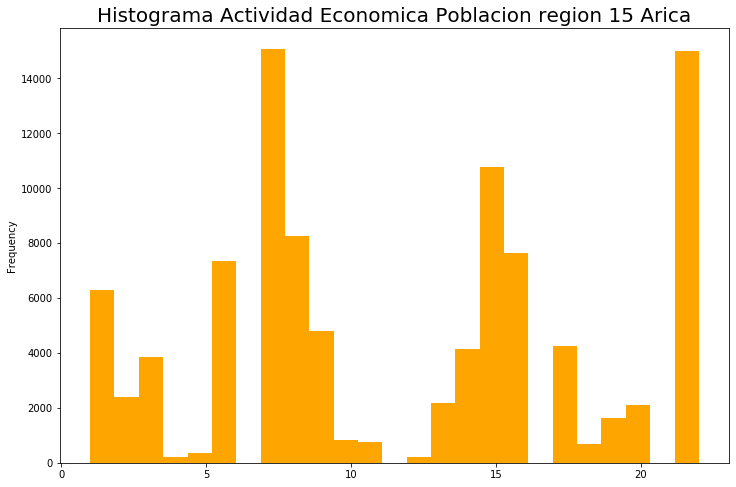

In [92]:
plt.figure(figsize=(12,8))
plt.title('Histograma Actividad Economica Poblacion region 15 Arica',fontdict={'fontsize':20})
df_15r_completo['Rama_acti_econom'][df_15r_completo['Rama_acti_econom']<30].plot(kind="hist", color='orange',log=False,bins=25)

In [93]:
# Se cera una lista Indice de Actividades economicas que contiene Letra 
Indice_acti_econom2=['1','Agricultura','2','Mineria','3','Manufactura','4','Suministro Electricidad',
                    '5','Suministro de Agua','6','Construccion','7','Comercio','8','Transporte',
                    '9','Alojamiento y Comidas','10','Informacion y comunicaciones','11','Financieras y Seguros',
                    '12','Inmobiliaria','13','Profesiones Cientificas y Tecnicas','14','Administrativas y Apoyo',
                    '15','Administracion Publica y Defensa','16','Eduacacion','17','Salud','18','Artisticas y Recreativas',
                    '19','Otras actividades de Servicio','20','Actividades de los hogares como empleadores',
                    '21','Actividades Extraterritoriales','22','Rama no Declarada','98','No Aplica','99','Dato Perdido']

In [94]:
Actividad_Economica2=crear_lista_pares(Indice_acti_econom2)

In [95]:
Actividad_Economica2

[('1', 'Agricultura'),
 ('2', 'Mineria'),
 ('3', 'Manufactura'),
 ('4', 'Suministro Electricidad'),
 ('5', 'Suministro de Agua'),
 ('6', 'Construccion'),
 ('7', 'Comercio'),
 ('8', 'Transporte'),
 ('9', 'Alojamiento y Comidas'),
 ('10', 'Informacion y comunicaciones'),
 ('11', 'Financieras y Seguros'),
 ('12', 'Inmobiliaria'),
 ('13', 'Profesiones Cientificas y Tecnicas'),
 ('14', 'Administrativas y Apoyo'),
 ('15', 'Administracion Publica y Defensa'),
 ('16', 'Eduacacion'),
 ('17', 'Salud'),
 ('18', 'Artisticas y Recreativas'),
 ('19', 'Otras actividades de Servicio'),
 ('20', 'Actividades de los hogares como empleadores'),
 ('21', 'Actividades Extraterritoriales'),
 ('22', 'Rama no Declarada'),
 ('98', 'No Aplica'),
 ('99', 'Dato Perdido')]

In [96]:
dataframe_a_graficar=df_15r_completo[['Rama_acti_econom']]
dataframe_a_graficar['Rama_acti_econom'] = dataframe_a_graficar['Rama_acti_econom'].astype(str)
#astype, para cambiar el tipo de variable o columna
dataframe_a_graficar.dtypes
renombrar_categorias_columna(dataframe_a_graficar,'Rama_acti_econom',Actividad_Economica2)

/home/c4-2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/c4-2/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Text(0.5, 1.0, 'Actividades poblacion Region 15, Arica y Parinacota')

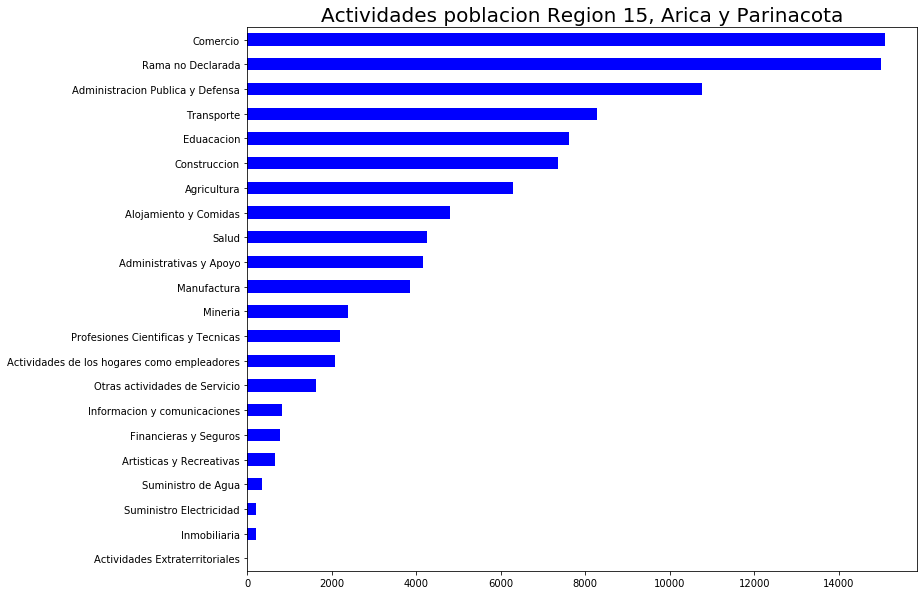

In [97]:
#Arica_Activ_Economica=df_15r_completo['Rama_acti_econom'].value_counts().sort_values()
Arica_Activ_Economica=dataframe_a_graficar['Rama_acti_econom'][df_15r_completo['Rama_acti_econom']<24].value_counts().sort_values()
Arica_Activ_Economica.plot.barh(figsize=(12,10), color=('b'));
plt.title('Actividades poblacion Region 15, Arica y Parinacota',fontdict={'fontsize':20})

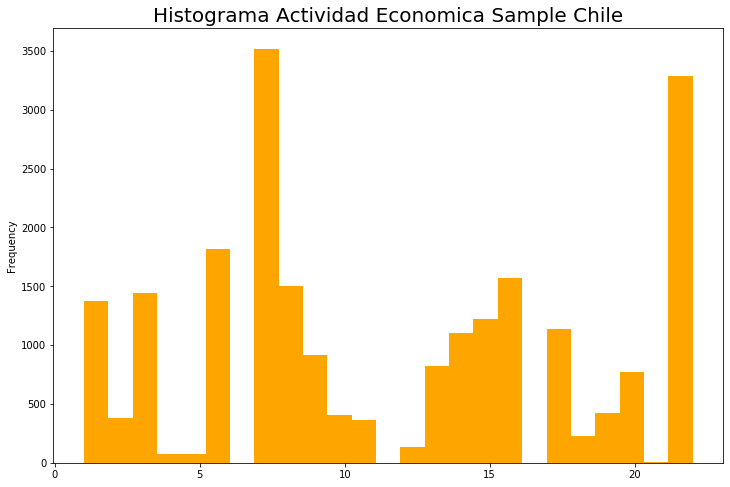

In [98]:
plt.figure(figsize=(12,8))
plt.title('Histograma Actividad Economica Sample Chile',fontdict={'fontsize':20})

df_graf_hist_chile = df_chile_copia['Rama_acti_econom'][df_chile_copia['Rama_acti_econom']<23]
df_graf_hist_chile.plot(kind="hist", color='orange',log=False,bins=25)

In [99]:
dataframe_a_graficar=df_chile_copia[['Rama_acti_econom']]
dataframe_a_graficar['Rama_acti_econom'] = dataframe_a_graficar['Rama_acti_econom'].astype(str)
#astype, para cambiar el tipo de variable o columna
dataframe_a_graficar.dtypes
renombrar_categorias_columna(dataframe_a_graficar,'Rama_acti_econom',Actividad_Economica2)

/home/c4-2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/c4-2/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Text(0.5, 1.0, 'Actividades poblacion sample Chile')

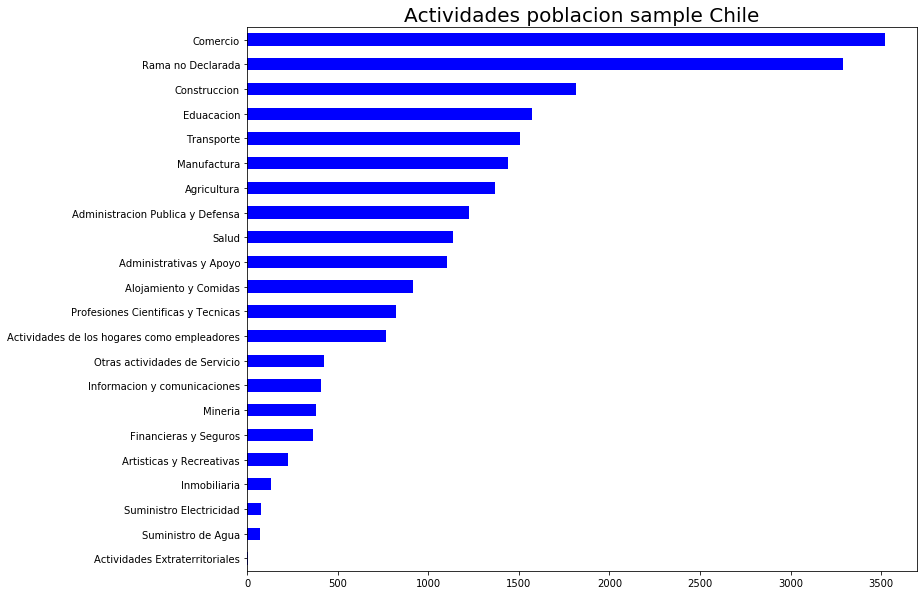

In [100]:
#Arica_Activ_Economica=df_15r_completo['Rama_acti_econom'].value_counts().sort_values()
Arica_Activ_Economica=dataframe_a_graficar['Rama_acti_econom'][df_chile_copia['Rama_acti_econom']<24].value_counts().sort_values()
Arica_Activ_Economica.plot.barh(figsize=(12,10), color=('b'));
plt.title('Actividades poblacion sample Chile',fontdict={'fontsize':20})

- Se graficaran Poblacion de Extranjeros en la region de Arica y Parinacota

In [101]:
dataframe_a_graficar=df_15r_completo[['Pais_habitual']]
dataframe_a_graficar['Pais_habitual'] = dataframe_a_graficar['Pais_habitual'].astype(str)
#astype, para cambiar el tipo de variable o columna
dataframe_a_graficar.dtypes
renombrar_categorias_columna(dataframe_a_graficar,'Pais_habitual',Actividad_Economica2)

/home/c4-2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Pais de Residencia_Habitual')

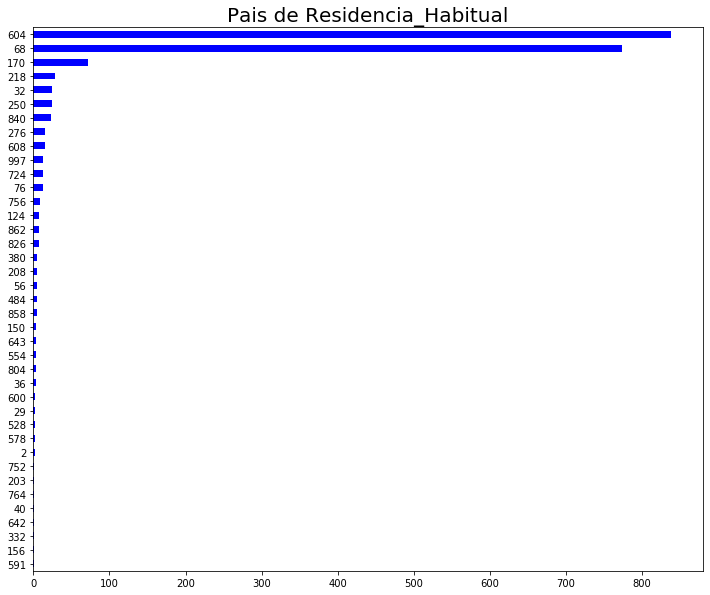

In [102]:
#Arica_Activ_Economica=df_15r_completo['Rama_acti_econom'].value_counts().sort_values()
Extranjeros_Arica=df_15r_completo['Pais_habitual'][df_15r_completo['Pais_habitual']<998].value_counts().sort_values()
Extranjeros_Arica.plot.barh(figsize=(12,10), color=('b'));
plt.title('Pais de Residencia_Habitual',fontdict={'fontsize':20})

In [103]:
Extranjeros_Arica=Extranjeros_Arica.sort_values(ascending=False).head(20)

In [104]:
Extranjeros_Arica

604    838
68     774
170     72
218     29
32      24
250     24
840     23
276     15
608     15
724     13
76      13
997     13
756      9
124      7
862      7
826      7
56       5
858      5
484      5
208      5
Name: Pais_habitual, dtype: int64

In [105]:
# Se crea una lista con todas las categotias letras de la columna 'Rama_acti_econom'
letras_acti_econom=df_15r_completo['Pais_nacim'].unique()

# Se ordena la lista alfafeticamente
letras_acti_econom=sorted(letras_acti_econom)

### Pregunta 5: Correlaciones, Analisis Factorial, Regresion Lineal 

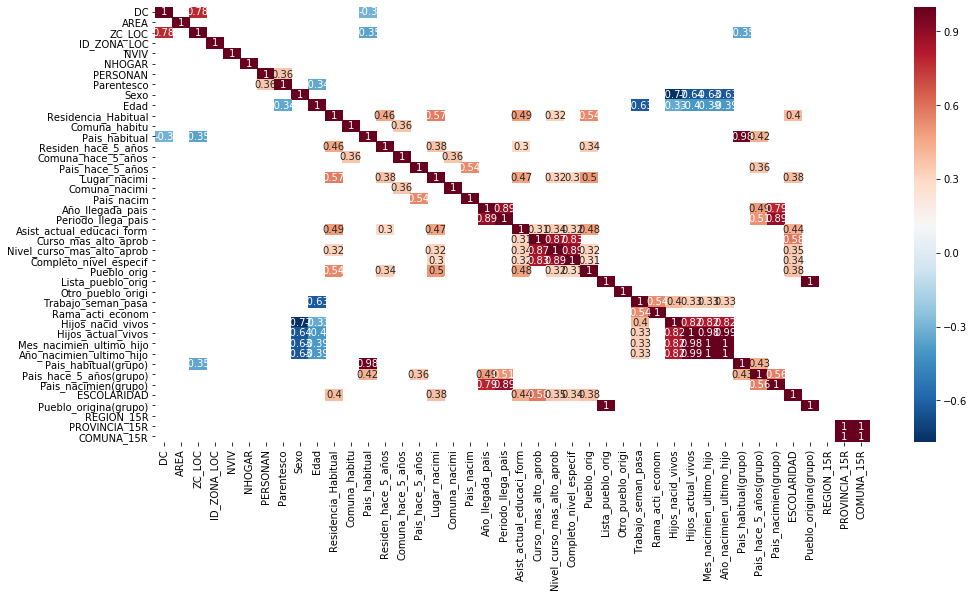

In [106]:
plt.figure(figsize=(16,8))
corr_mat = df_15r_completo.corr()
corr_mat_graph = corr_mat[abs(corr_mat) >= 0.3]
sns.heatmap(corr_mat_graph, cmap="RdBu_r", annot=True)

In [107]:
#corr_mat

In [108]:
df2 = corr_mat.mask(corr_mat <= 0.3)

In [109]:
df3 = df2.mask(df2 == 1)

In [110]:
#df3=df3.reset_index()


In [111]:
df3

,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,Parentesco,Sexo,Edad,...,Mes_nacimien_ultimo_hijo,Año_nacimien_ultimo_hijo,Pais_habitual(grupo),Pais_hace_5_años(grupo),Pais_nacimien(grupo),ESCOLARIDAD,Pueblo_origina(grupo),REGION_15R,PROVINCIA_15R,COMUNA_15R
DC,NaN,NaN,0.779256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AREA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZC_LOC,0.779256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_ZONA_LOC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NVIV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NHOGAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PERSONAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.364109,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parentesco,NaN,NaN,NaN,NaN,NaN,NaN,0.364109,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sexo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
lista_columnas_df3=df3.columns

In [113]:
valores=[]
for i in range (0,lista_columnas_df3.shape[0]):
    valores.append(i)

In [114]:
#keys = ['a', 'b', 'c']
#values = [1, 2, 3]
dictionary = dict(zip(lista_columnas_df3, valores))
print(dictionary)
#{'a': 1, 'b': 2, 'c': 3}

{'DC': 0, 'AREA': 1, 'ZC_LOC': 2, 'ID_ZONA_LOC': 3, 'NVIV': 4, 'NHOGAR': 5, 'PERSONAN': 6, 'Parentesco': 7, 'Sexo': 8, 'Edad': 9, 'Residencia_Habitual': 10, 'Comuna_habitu': 11, 'Pais_habitual': 12, 'Residen_hace_5_años': 13, 'Comuna_hace_5_años': 14, 'Pais_hace_5_años': 15, 'Lugar_nacimi': 16, 'Comuna_nacimi': 17, 'Pais_nacim': 18, 'Año_llegada_pais': 19, 'Periodo_llega_pais': 20, 'Asist_actual_educaci_form': 21, 'Curso_mas_alto_aprob': 22, 'Nivel_curso_mas_alto_aprob': 23, 'Completo_nivel_especif': 24, 'Pueblo_orig': 25, 'Lista_pueblo_orig': 26, 'Otro_pueblo_origi': 27, 'Trabajo_seman_pasa': 28, 'Rama_acti_econom': 29, 'Hijos_nacid_vivos': 30, 'Hijos_actual_vivos': 31, 'Mes_nacimien_ultimo_hijo': 32, 'Año_nacimien_ultimo_hijo': 33, 'Pais_habitual(grupo)': 34, 'Pais_hace_5_años(grupo)': 35, 'Pais_nacimien(grupo)': 36, 'ESCOLARIDAD': 37, 'Pueblo_origina(grupo)': 38, 'REGION_15R': 39, 'PROVINCIA_15R': 40, 'COMUNA_15R': 41}


In [115]:
print(dictionary['DC'])

0


In [116]:
dictionary2 = dict(zip(valores,lista_columnas_df3))
print(dictionary2)

{0: 'DC', 1: 'AREA', 2: 'ZC_LOC', 3: 'ID_ZONA_LOC', 4: 'NVIV', 5: 'NHOGAR', 6: 'PERSONAN', 7: 'Parentesco', 8: 'Sexo', 9: 'Edad', 10: 'Residencia_Habitual', 11: 'Comuna_habitu', 12: 'Pais_habitual', 13: 'Residen_hace_5_años', 14: 'Comuna_hace_5_años', 15: 'Pais_hace_5_años', 16: 'Lugar_nacimi', 17: 'Comuna_nacimi', 18: 'Pais_nacim', 19: 'Año_llegada_pais', 20: 'Periodo_llega_pais', 21: 'Asist_actual_educaci_form', 22: 'Curso_mas_alto_aprob', 23: 'Nivel_curso_mas_alto_aprob', 24: 'Completo_nivel_especif', 25: 'Pueblo_orig', 26: 'Lista_pueblo_orig', 27: 'Otro_pueblo_origi', 28: 'Trabajo_seman_pasa', 29: 'Rama_acti_econom', 30: 'Hijos_nacid_vivos', 31: 'Hijos_actual_vivos', 32: 'Mes_nacimien_ultimo_hijo', 33: 'Año_nacimien_ultimo_hijo', 34: 'Pais_habitual(grupo)', 35: 'Pais_hace_5_años(grupo)', 36: 'Pais_nacimien(grupo)', 37: 'ESCOLARIDAD', 38: 'Pueblo_origina(grupo)', 39: 'REGION_15R', 40: 'PROVINCIA_15R', 41: 'COMUNA_15R'}


In [117]:
print(dictionary2[0])

DC


In [118]:
lista_alta_correlacion=[]
for i in range(0,len(df3)):
    aaa=df3.iloc[i:i+1]
    aaa=aaa.dropna(axis=1, how='all')
    #print(aaa.columns)
    lista_alta_correlacion.append(aaa.columns)
                 

In [119]:
#lista_alta_correlacion

In [120]:
#lista_columnas_df3

In [121]:
lista_correlaciones=[]
for i in range(0,len(lista_columnas_df3)):
    #print(len(lista_columnas_df3))
    nombre_col_select=lista_columnas_df3[i]
    cant_elementos=len(lista_alta_correlacion[i])
    for j in range(0,cant_elementos):
        #lista_par=[((nombre_col_select),(lista_alta_correlacion[i][j]))]
        #lista_par2=[((i),dictionary[(lista_alta_correlacion[i][j])])]
        lista_par2=[(i),dictionary[(lista_alta_correlacion[i][j])]]
        #lista_par2=[((i),dictionary[((lista_alta_correlacion[i][j])))]
        lista_correlaciones.append(lista_par2)


In [122]:
# lista_par2=[]
# for i in range(0,len(lista_correlaciones)):
#     lista_par2=[((dictionary[lista_correlaciones[i][1]]),())]

In [123]:
#lista_correlaciones[0][0][1]

In [124]:
lista_correlaciones

[[0, 2],
 [2, 0],
 [6, 7],
 [7, 6],
 [10, 13],
 [10, 16],
 [10, 21],
 [10, 23],
 [10, 25],
 [10, 37],
 [11, 14],
 [12, 34],
 [12, 35],
 [13, 10],
 [13, 16],
 [13, 21],
 [13, 25],
 [14, 11],
 [14, 17],
 [15, 18],
 [15, 35],
 [16, 10],
 [16, 13],
 [16, 21],
 [16, 23],
 [16, 24],
 [16, 25],
 [16, 37],
 [17, 14],
 [18, 15],
 [19, 20],
 [19, 35],
 [19, 36],
 [20, 19],
 [20, 35],
 [20, 36],
 [21, 10],
 [21, 13],
 [21, 16],
 [21, 22],
 [21, 23],
 [21, 24],
 [21, 25],
 [21, 37],
 [22, 21],
 [22, 23],
 [22, 24],
 [22, 37],
 [23, 10],
 [23, 16],
 [23, 21],
 [23, 22],
 [23, 24],
 [23, 25],
 [23, 37],
 [24, 16],
 [24, 21],
 [24, 22],
 [24, 23],
 [24, 25],
 [24, 37],
 [25, 10],
 [25, 13],
 [25, 16],
 [25, 21],
 [25, 23],
 [25, 24],
 [25, 37],
 [26, 38],
 [28, 29],
 [28, 30],
 [28, 31],
 [28, 32],
 [28, 33],
 [29, 28],
 [30, 28],
 [30, 31],
 [30, 32],
 [30, 33],
 [31, 28],
 [31, 30],
 [31, 32],
 [31, 33],
 [32, 28],
 [32, 30],
 [32, 31],
 [32, 33],
 [33, 28],
 [33, 30],
 [33, 31],
 [33, 32],
 [34, 1

In [125]:
# from iteration_utilities import unique_everseen
# resultado=list(unique_everseen(lista_correlaciones, key=set))


In [126]:
#resultado

In [127]:
#lst = [[1,2],[1,3],[1,4],[2,1],[2,5],[3,1],[3,2]] 
seen = set()
result = []

for x in lista_correlaciones:
        s = frozenset(x)
        if s not in seen:
            result.append(x)
            seen.add(s)

In [128]:
result
#drop duplicate pairs with different order list
#https://stackoverflow.com/questions/52230596/need-to-remove-duplicates-from-a-nested-list-preserving-the-order
#len(lista_alta_correlacion[11])

[[0, 2],
 [6, 7],
 [10, 13],
 [10, 16],
 [10, 21],
 [10, 23],
 [10, 25],
 [10, 37],
 [11, 14],
 [12, 34],
 [12, 35],
 [13, 16],
 [13, 21],
 [13, 25],
 [14, 17],
 [15, 18],
 [15, 35],
 [16, 21],
 [16, 23],
 [16, 24],
 [16, 25],
 [16, 37],
 [19, 20],
 [19, 35],
 [19, 36],
 [20, 35],
 [20, 36],
 [21, 22],
 [21, 23],
 [21, 24],
 [21, 25],
 [21, 37],
 [22, 23],
 [22, 24],
 [22, 37],
 [23, 24],
 [23, 25],
 [23, 37],
 [24, 25],
 [24, 37],
 [25, 37],
 [26, 38],
 [28, 29],
 [28, 30],
 [28, 31],
 [28, 32],
 [28, 33],
 [30, 31],
 [30, 32],
 [30, 33],
 [31, 32],
 [31, 33],
 [32, 33],
 [34, 35],
 [35, 36],
 [40, 41]]

In [129]:
#lista_correlaciones

In [130]:
print(len(result))

56


In [131]:
result[0][1]

2

In [132]:
#pairs = [(0,1),(0,1),(1,0)]
#set(tuple(sorted(p)) for p in lista_correlaciones)
#set([(0, 1)])

In [133]:
lista_final=[]
for r in range(0,len(result)):        
        #r2=r+1
        lista_temporal = [(dictionary2[result[r][0]]),(dictionary2[result[r][1]])]
        #lista_temporal2 = []
        lista_final.append(lista_temporal)
        #lista_trabajada2 = [(dictionary2[r])
        #lista_par2=[(i),dictionary[(lista_alta_correlacion[i][j])]]
        #lista_correlaciones.append(lista_par2)

In [134]:
lista_final

[['DC', 'ZC_LOC'],
 ['PERSONAN', 'Parentesco'],
 ['Residencia_Habitual', 'Residen_hace_5_años'],
 ['Residencia_Habitual', 'Lugar_nacimi'],
 ['Residencia_Habitual', 'Asist_actual_educaci_form'],
 ['Residencia_Habitual', 'Nivel_curso_mas_alto_aprob'],
 ['Residencia_Habitual', 'Pueblo_orig'],
 ['Residencia_Habitual', 'ESCOLARIDAD'],
 ['Comuna_habitu', 'Comuna_hace_5_años'],
 ['Pais_habitual', 'Pais_habitual(grupo)'],
 ['Pais_habitual', 'Pais_hace_5_años(grupo)'],
 ['Residen_hace_5_años', 'Lugar_nacimi'],
 ['Residen_hace_5_años', 'Asist_actual_educaci_form'],
 ['Residen_hace_5_años', 'Pueblo_orig'],
 ['Comuna_hace_5_años', 'Comuna_nacimi'],
 ['Pais_hace_5_años', 'Pais_nacim'],
 ['Pais_hace_5_años', 'Pais_hace_5_años(grupo)'],
 ['Lugar_nacimi', 'Asist_actual_educaci_form'],
 ['Lugar_nacimi', 'Nivel_curso_mas_alto_aprob'],
 ['Lugar_nacimi', 'Completo_nivel_especif'],
 ['Lugar_nacimi', 'Pueblo_orig'],
 ['Lugar_nacimi', 'ESCOLARIDAD'],
 ['Año_llegada_pais', 'Periodo_llega_pais'],
 ['Año_llegad

In [155]:
def punto10(df, i, j):

    print('Coeficiente de Correlación de Pearson:\n i con j:\t',
          round(df[i].corr(df[j], method='pearson'), 3))

    plt.figure(figsize=(20, 7))
    sns.scatterplot(x=df[i], y=df[j])
    plt.title('Relación entre i y j ', fontsize=14)

    r = plt.figure(figsize=(15, 10))

    t = plt.figure(figsize=(15, 10))

#     mask = np.zeros_like(df.corr(method='pearson'), dtype=np.bool)
#     mask[np.triu_indices_from(mask)] = True

#     sns.heatmap(df.corr(method='pearson'),
#                 annot=True,
#                 fmt='.3f',
#                 mask=mask,
#                 cmap='YlOrBr')
#     plt.yticks(rotation=0)
#     plt.show()

    return (r, t)

Coeficiente de Correlación de Pearson:
 i con j:	 0.364


(<Figure size 1080x720 with 0 Axes>, <Figure size 1080x720 with 0 Axes>)

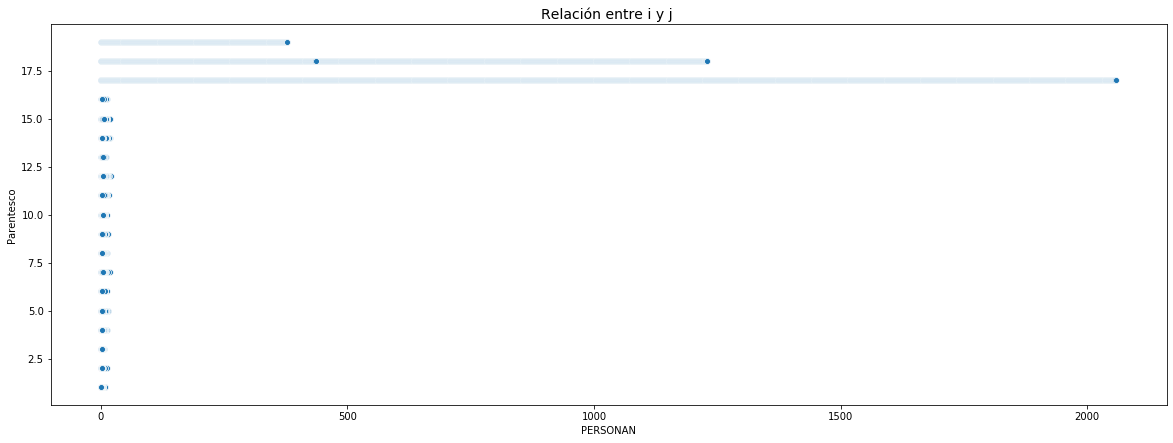

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [157]:
punto10(df_15r_completo,"PERSONAN","Parentesco")

In [ ]:
# dataframe sample data
# df1 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
# df2 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
# df3 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
# df4 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
# df5 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
# df6 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
#define number of rows and columns for subplots
# nrow=3
# ncol=2
# # make a list of all dataframes 
# df_list = [df1 ,df2, df3, df4, df5, df6]
# fig, axes = plt.subplots(nrow, ncol)
# # plot counter
# count=0
# for r in range(nrow):
#     for c in range(ncol):
#         df_list[count].plot(ax=axes[r,c])
#         count=+1

In [137]:
# def unique_pairs(pairs): 
#     return list(map(list,set(map(frozenset, pairs))))

In [138]:
# ccc=unique_pairs(lista_correlaciones)

In [139]:
# len(ccc)

### Pregunta 6 : Creacion Base SQL Censo Organizada tipologia Estrella y carga de Datos
 

In [140]:
df_15r_completo=df_15r_completo.reset_index()

In [141]:
df_15r_completo=df_15r_completo.rename({'index': 'Id_encuestado'}, axis=1)

In [142]:
df_15r_completo.columns

Index(['Id_encuestado', 'DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC', 'NVIV',
       'NHOGAR', 'PERSONAN', 'Parentesco', 'Sexo', 'Edad',
       'Residencia_Habitual', 'Comuna_habitu', 'Pais_habitual',
       'Residen_hace_5_años', 'Comuna_hace_5_años', 'Pais_hace_5_años',
       'Lugar_nacimi', 'Comuna_nacimi', 'Pais_nacim', 'Año_llegada_pais',
       'Periodo_llega_pais', 'Asist_actual_educaci_form',
       'Curso_mas_alto_aprob', 'Nivel_curso_mas_alto_aprob',
       'Completo_nivel_especif', 'Pueblo_orig', 'Lista_pueblo_orig',
       'Otro_pueblo_origi', 'Trabajo_seman_pasa', 'Rama_acti_econom',
       'Hijos_nacid_vivos', 'Hijos_actual_vivos', 'Mes_nacimien_ultimo_hijo',
       'Año_nacimien_ultimo_hijo', 'Pais_habitual(grupo)',
       'Pais_hace_5_años(grupo)', 'Pais_nacimien(grupo)', 'ESCOLARIDAD',
       'Pueblo_origina(grupo)', 'REGION_15R', 'PROVINCIA_15R', 'COMUNA_15R'],
      dtype='object')

- Se crean 4 dataframes en base al dataframe completo de censo region 15
  se separan en cuantro categorias:
   hogar_ubicacion del estrevistado , nivel de educacion , trabajo , Hijos.

In [143]:
Entrevistado_hogar_ubicacion=df_15r_completo[['Id_encuestado','DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC', 'NVIV', 'NHOGAR', 'PERSONAN',
       'Parentesco', 'Sexo', 'Edad', 'Residencia_Habitual', 'Comuna_habitu',
       'Pais_habitual', 'Residen_hace_5_años', 'Comuna_hace_5_años',
       'Pais_hace_5_años', 'Lugar_nacimi', 'Comuna_nacimi', 'Pais_nacim',
       'Año_llegada_pais', 'Periodo_llega_pais']]



In [144]:
Entrevistado_Educacion=df_15r_completo[['Id_encuestado','Asist_actual_educaci_form',
       'Curso_mas_alto_aprob', 'Nivel_curso_mas_alto_aprob',
       'Completo_nivel_especif']]

In [145]:
Entrevistado_Trabajo=df_15r_completo[['Id_encuestado','Trabajo_seman_pasa', 'Rama_acti_econom']]

In [146]:
Entrevistado_hijos=df_15r_completo[['Id_encuestado','Hijos_nacid_vivos', 'Hijos_actual_vivos', 'Mes_nacimien_ultimo_hijo',
       'Año_nacimien_ultimo_hijo']]

In [147]:
#Se graban en disco los 4 dataframes creados en el punto anterior como archivos extension CSV
Entrevistado_hogar_ubicacion.to_csv('Entrevistado_hogar_ubicacion.csv',index=False,sep=';')
Entrevistado_Educacion.to_csv('Entrevistado_Educacion.csv',index=False,sep=';')
Entrevistado_Trabajo.to_csv('Entrevistado_Trabajo.csv',index=False,sep=';')
Entrevistado_hijos.to_csv('Entrevistado_hijos.csv',index=False,sep=';')

- Se Creo en Dbeaver la base censo
  Se procede a crear las tablas en la base censo
  desde Phyton

In [148]:
#Ingresamos al servidor de SQL y activamos un elemento cursor

con = psycopg2.connect("host=localhost dbname=censo user=postgres password=calei1234")
cur = con.cursor()

In [149]:
Entrevistado_hogar_ubicacion.dtypes

Id_encuestado          int64
DC                     int64
AREA                   int64
ZC_LOC                 int64
ID_ZONA_LOC            int64
NVIV                   int64
NHOGAR                 int64
PERSONAN               int64
Parentesco             int64
Sexo                   int64
Edad                   int64
Residencia_Habitual    int64
Comuna_habitu          int64
Pais_habitual          int64
Residen_hace_5_años    int64
Comuna_hace_5_años     int64
Pais_hace_5_años       int64
Lugar_nacimi           int64
Comuna_nacimi          int64
Pais_nacim             int64
Año_llegada_pais       int64
Periodo_llega_pais     int64
dtype: object

In [150]:
# Creamos las tabla "Entrevistado_hogar_ubicacion" en la base de datos SQL censo
cur.execute('''CREATE TABLE Entrevistado_hogar_ubicacion
   (Id_encuestado  int ,
   DC int ,
   AREA int ,
   ZC_LOC int ,
   ID_ZONA_LOC int ,       
   NVIV int ,
   NHOGAR int ,
   PERSONAN int ,
   Parentesco int ,
   Sexo int ,
   Edad int ,
   Residencia_Habitual int ,
   Comuna_habitu int ,
   Pais_habitual int ,
   Residen_hace_5_años int,
   Comuna_hace_5_años int ,
   Pais_hace_5_años int ,
   Lugar_nacimi int ,
   Comuna_nacimi int ,
   Pais_nacim int ,
   Año_llegada_pais int ,
   Periodo_llega_pais int);''')
 
con.commit()

DuplicateTable: relation "entrevistado_hogar_ubicacion" already exists


In [ ]:
# Volcamos la informacion del archivo Entrevistado_hogar_ubicacion.csv a la tabla Entrevistado_hogar_ubicacion de BBDD Censo
file= open(r'/home/c4-2/Descargas/Censo_15/Entrevistado_hogar_ubicacion.csv','r')
next(file)
cur.copy_from(file,'Entrevistado_hogar_ubicacion',sep=';')
file.close

con.commit()

In [ ]:
# se crea una nueva columna en la tabla Entrevistado_hogar_ubicacio  llamada Id_encuestado2
# puesto que se encontro que id_encuestado tenia registros duplicados 
cur.execute('''ALTER TABLE Entrevistado_hogar_ubicacion ADD Id_encuestado2 SERIAL;''')
con.commit()

In [ ]:
# se asigna como Primary Key a la columna Id_encuestado2 de la tabla Entrevistado_hogar_ubicacion
cur.execute('''ALTER TABLE Entrevistado_hogar_ubicacion ADD PRIMARY KEY (Id_encuestado2);''')
con.commit()

In [ ]:
Entrevistado_Educacion.dtypes

In [ ]:
# Creamos las tabla "Entrevistado_Educacion" en la base de datos SQL censo
cur.execute('''CREATE TABLE Entrevistado_Educacion
   (Id_encuestado int ,
   Asist_actual_educaci_form int ,
   Curso_mas_alto_aprob int ,
   Nivel_curso_mas_alto_aprob int ,
   Completo_nivel_especif int);''')
 
con.commit()

In [ ]:
# Volcamos la informacion del archivo Entrevistado_Educacion.csv a la tabla Entrevistado_Educacion ubicacion de BBDD Censo
file= open(r'/home/c4-2/Descargas/Censo_15/Entrevistado_Educacion.csv','r')
next(file)
cur.copy_from(file,'Entrevistado_Educacion',sep=';')
file.close

con.commit()

In [ ]:
# se crea una nueva columna en la tabla Entrevistado_Educacion llamada Id_encuestado2
cur.execute('''ALTER TABLE Entrevistado_Educacion ADD Id_encuestado2 SERIAL;''')
con.commit()

In [ ]:
# Se relaciona la foreing key Id_encuestado2 de la tabla Entrevistado_Educacion a la primary key Id_encuestado2 de la tabla Entrevistado_hogar_ubicacion
cur.execute('''ALTER TABLE Entrevistado_Educacion ADD FOREIGN KEY (Id_encuestado2) REFERENCES Entrevistado_hogar_ubicacion(Id_encuestado2);''')
con.commit()


In [ ]:
Entrevistado_Trabajo.dtypes

In [ ]:
# Creamos las tabla "Entrevistado_Trabajo" en la base de datos SQL censo
cur.execute('''CREATE TABLE Entrevistado_Trabajo
   (Id_encuestado int ,
   Trabajo_seman_pasa int ,
   Rama_acti_econom int);''')
 
con.commit()

In [ ]:
# Volcamos la informacion del archivo Entrevistado_Trabajo.csv a la tabla Entrevistado_Trabajo ubicacion de BBDD Censo
file= open(r'/home/c4-2/Descargas/Censo_15/Entrevistado_Trabajo.csv','r')
next(file)
cur.copy_from(file,'Entrevistado_Trabajo',sep=';')
file.close

con.commit()

In [ ]:
# se crea una nueva columna en la tabla Entrevistado_Trabajo llamada Id_encuestado2
cur.execute('''ALTER TABLE Entrevistado_Trabajo ADD Id_encuestado2 SERIAL;''')
con.commit()

In [ ]:
# Se relaciona la foreing key Id_encuestado2 de la tabla Entrevistado_Trabajo a la primary key Id_encuestado2 de la tabla Entrevistado_hogar_ubicacion
cur.execute('''ALTER TABLE Entrevistado_Trabajo ADD FOREIGN KEY (Id_encuestado2) REFERENCES Entrevistado_hogar_ubicacion(Id_encuestado2);''')
con.commit()

In [ ]:
Entrevistado_hijos.dtypes

In [ ]:
# Creamos las tabla "Entrevistado_hijos" en la base de datos SQL censo
cur.execute('''CREATE TABLE Entrevistado_hijos
   (Id_encuestado int ,
   Hijos_nacid_vivos int ,
   Hijos_actual_vivos int ,
   Mes_nacimien_ultimo_hijo int ,
   Año_nacimien_ultimo_hijo int);''')
 
con.commit()

In [ ]:
# Volcamos la informacion del archivo Entrevistado_hijos.csv a la tabla Entrevistado_hijos de BBDD Censo
file= open(r'/home/c4-2/Descargas/Censo_15/Entrevistado_hijos.csv','r')
next(file)
cur.copy_from(file,'Entrevistado_hijos',sep=';')
file.close

con.commit()

In [ ]:
# se crea una nueva columna en la tabla Entrevistado_hijos llamada Id_encuestado2
cur.execute('''ALTER TABLE Entrevistado_hijos ADD Id_encuestado2 SERIAL;''')
con.commit()

In [ ]:
# Se relaciona la foreing key Id_encuestado2 de la tabla Entrevistado_hijos a la primary key Id_encuestado2 de la tabla Entrevistado_hogar_ubicacion
cur.execute('''ALTER TABLE Entrevistado_hijos ADD FOREIGN KEY (Id_encuestado2) REFERENCES Entrevistado_hogar_ubicacion(Id_encuestado2);''')
con.commit()

In [ ]:
#Cerramos conexiones con la BD
# Se cierra la BBDD SQL censo y tambien su cursor para su manejo desde Jupyter
cur.close()
con.close()